# Weather_Project:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Project Description:

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement:
    
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

Dataset Description:

Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

a)For Finding  to forecast whether or not it will rain tomorrow.(Chances of Rainfall Tomorrow):

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


Exploratory Data Analysis:

In [6]:
df.shape

(8425, 23)

There are 8425 rows and 23 columns present in the dataset.

In [3]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

There are two types of data(i.e., object and float64) present in this dataset.

In [4]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Null values are present in MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir,WindGustSpeed,WindDir9am WindDir3pm, WindSpeed9am, WindSpeed3pm,  Humidity9am, Humidity3pm, Pressure9am , Pressure3pm  , Cloud9am    ,  Cloud3pm  ,  Temp9am  ,  Temp3pm  ,  RainToday ,  RainTomorrow columns.

<AxesSubplot:>

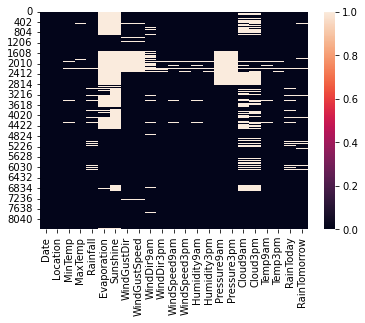

In [4]:
#Let's check null values using heatmap
sns.heatmap(df.isnull())

In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8420    False
8421    False
8422    False
8423    False
8424    False
Length: 8425, dtype: bool

In [5]:
df.duplicated().sum()

1663

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

In [9]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [10]:
#Filling the null values
df["MinTemp"]=df["MinTemp"].fillna(df["MinTemp"].mean())
df["MaxTemp"]=df["MaxTemp"].fillna(df["MaxTemp"].mean())
df["Rainfall"]=df["Rainfall"].fillna(df["Rainfall"].mean())
df["Evaporation"]=df["Evaporation"].fillna(df["Evaporation"].mean())
df["Sunshine"]=df["Sunshine"].fillna(df["Sunshine"].mean())
df["WindGustDir"]=df["WindGustDir"].fillna(method="ffill")
df["WindGustSpeed"]=df["WindGustSpeed"].fillna(df["WindGustSpeed"].mean())
df["WindDir9am"]=df["WindDir9am"].fillna(method="ffill")
df["WindDir3pm"]=df["WindDir3pm"].fillna(method="ffill")
df["WindSpeed9am"]=df["WindSpeed9am"].fillna(df["WindSpeed9am"].mean())
df["WindSpeed3pm"]=df["WindSpeed3pm"].fillna(df["WindSpeed3pm"].mean())
df["Humidity9am"]=df["Humidity9am"].fillna(df["Humidity9am"].mean())
df["Humidity3pm"]=df["Humidity3pm"].fillna(df["Humidity3pm"].mean())
df["Pressure9am"]=df["Pressure9am"].fillna(df["Pressure9am"].mean())
df["Pressure3pm"]=df["Pressure3pm"].fillna(df["Pressure3pm"].mean())
df["Cloud9am"]=df["Cloud9am"].fillna(df["Cloud9am"].mean())
df["Cloud3pm"]=df["Cloud3pm"].fillna(df["Cloud3pm"].mean())
df["Temp9am"]=df["Temp9am"].fillna(df["Temp9am"].mean())
df["Temp3pm"]=df["Temp3pm"].fillna(df["Temp3pm"].mean())
df["RainToday"]=df["RainToday"].fillna(method="ffill")
df["RainTomorrow"]=df["RainTomorrow"].fillna(method="ffill")


In [11]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<AxesSubplot:>

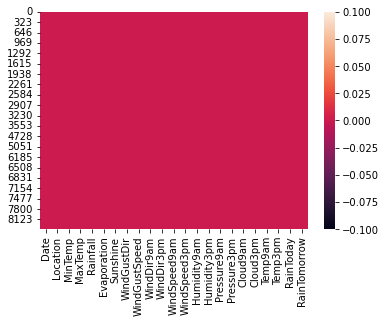

In [20]:
#Let's check null values using heatmap.
sns.heatmap(df.isnull())

In [12]:
df["Evaporation"].value_counts()

5.302395      2921
4.000000       141
3.000000       125
2.200000       118
2.400000       116
              ... 
145.000000       1
33.800000        1
59.200000        1
20.800000        1
0.700000         1
Name: Evaporation, Length: 117, dtype: int64

In [13]:
df["Evaporation"].nunique()

117

In [12]:
for i in df.columns:
    print(df[i].value_counts())

2011-02-11    4
2011-02-18    4
2011-03-18    4
2011-03-19    4
2011-03-20    4
             ..
2016-11-03    1
2016-11-02    1
2016-11-01    1
2016-10-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64
 13.109145    70
 13.200000    58
 12.000000    57
 14.800000    53
 12.700000    53
              ..
-1.200000      1
-1.500000      1
-1.700000      1
-0.800000      1
 26.000000     1
Name: MinTemp, Length: 286, dtype: int64
19.000000    66
19.800000    62
24.098345    57
23.800000    54
22.300000    54
             ..
10.300000     1
10.000000     1
10.400000     1
11.700000     1
43.500000     1
Name: MaxTemp, Length: 332, dtype: int64
0.000000      4334
0.200000       321
0.400000       144
2.

In [13]:
df["Rainfall"].value_counts()

0.000000      4334
0.200000       321
0.400000       144
2.780148       138
0.600000        87
              ... 
73.800000        1
23.800000        1
61.200000        1
128.000000       1
40.000000        1
Name: Rainfall, Length: 251, dtype: int64

In [15]:
df["RainTomorrow"].value_counts()

No     5151
Yes    1611
Name: RainTomorrow, dtype: int64

In [17]:
df["Rainfall"].nunique()

251

In [18]:
df["RainTomorrow"].nunique()

2

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6762 non-null   object 
 1   Location       6762 non-null   object 
 2   MinTemp        6762 non-null   float64
 3   MaxTemp        6762 non-null   float64
 4   Rainfall       6762 non-null   float64
 5   Evaporation    6762 non-null   float64
 6   Sunshine       6762 non-null   float64
 7   WindGustDir    6762 non-null   object 
 8   WindGustSpeed  6762 non-null   float64
 9   WindDir9am     6762 non-null   object 
 10  WindDir3pm     6762 non-null   object 
 11  WindSpeed9am   6762 non-null   float64
 12  WindSpeed3pm   6762 non-null   float64
 13  Humidity9am    6762 non-null   float64
 14  Humidity3pm    6762 non-null   float64
 15  Pressure9am    6762 non-null   float64
 16  Pressure3pm    6762 non-null   float64
 17  Cloud9am       6762 non-null   float64
 18  Cloud3pm

This gives the brief information about the column names, non-null values, data types and its memory usage of the given dataset.

In [21]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000
mean,13.109145,24.098345,2.780148,5.302395,7.890896,38.977663,12.782206,17.571150,67.506559,50.467147,1017.626311,1015.119923,4.336806,4.320988,17.895038,22.708561
std,5.540667,6.130123,10.482769,3.343713,2.733639,13.376457,9.787577,9.548634,17.182700,18.498341,6.027914,5.967638,2.474649,2.323276,5.722411,5.971845
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.000000,19.600000,0.000000,4.000000,7.890896,30.000000,6.000000,11.000000,56.000000,38.000000,1014.200000,1011.500000,2.000000,3.000000,13.900000,18.400000
50%,13.109145,23.500000,0.000000,5.302395,7.890896,38.977663,11.000000,17.000000,68.000000,50.000000,1017.626311,1015.119923,4.336806,4.320988,17.900000,22.300000
75%,17.400000,28.400000,1.200000,5.302395,9.200000,46.000000,19.000000,24.000000,80.000000,62.000000,1020.900000,1018.400000,7.000000,6.000000,22.200000,26.800000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


This gives the stastical summary of numerical columns.The counts of all the columns are same which means there are no missing values in the dataset.The summary of the dataset looks perfect since there is no invalid values present.

The mean is greater than the median in MaxTemp, Rainfall, WindSpeed9am, WindSpeed3pm, Humidity3pm,  Temp3pm columns which means the data is skewed to right in these columns.

The mean is less than the median in Humidity9am, Temp9am columns which means the data is skewed to left in these columns. 

The mean and median are same in MinTemp, Evaporation, Sunshine, WindGustSpeed, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm  columns which means the data is not skewed and it is normally distributed in these columns.  

By summarizing the data we can observe there is a huge differences between 75% and max,hence there are outliers present in the data.

We can also notice that the standard deviation, minimum value and 25% percentile values from this describe method.

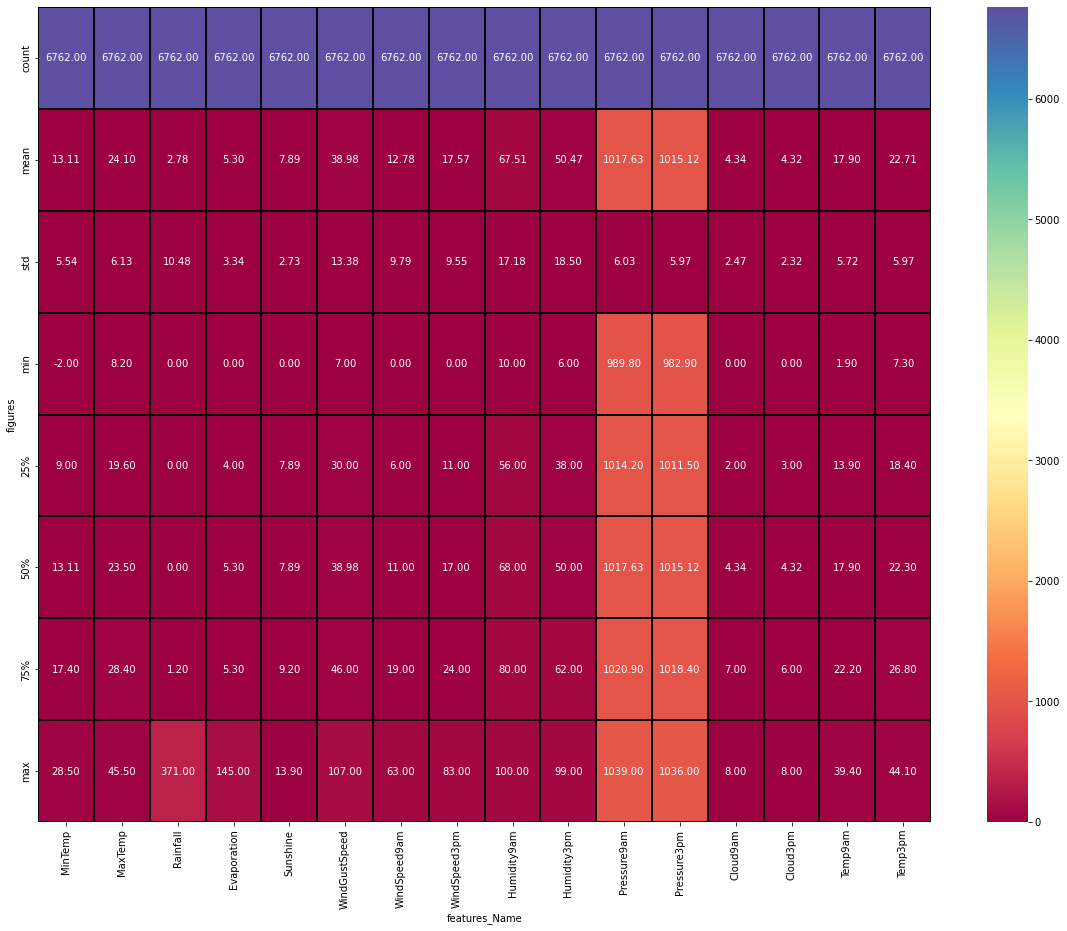

In [23]:
#let us visualize by using heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.describe(),annot=True,linewidth=0.2,linecolor="black",fmt="0.2f",cmap="Spectral")
plt.ylabel("figures")
plt.xlabel("features_Name")
plt.show()

Data Visualization:

Univariate Analysis:

No     5151
Yes    1611
Name: RainTomorrow, dtype: int64


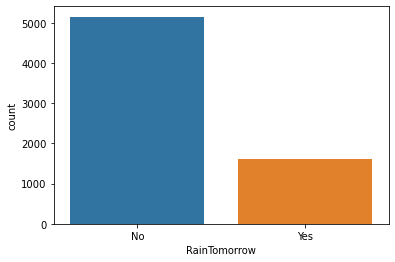

In [24]:
#Let's visualize the count of  RainTomorrow column.
sns.countplot(x="RainTomorrow",data=df)
print(df["RainTomorrow"].value_counts())

The No count is more for rainfall to Tomorrow.

2011-02-11    4
2011-02-18    4
2011-03-18    4
2011-03-19    4
2011-03-20    4
             ..
2016-11-03    1
2016-11-02    1
2016-11-01    1
2016-10-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64


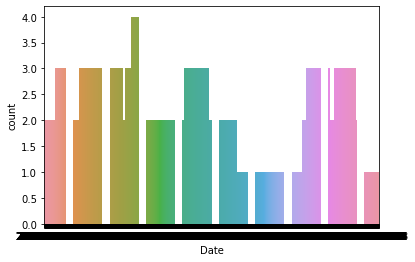

In [25]:
#Let's visualize the count of  Date column.
sns.countplot(x="Date",data=df)
print(df["Date"].value_counts())

The Date 2011-02-11 category is more compared to others.

PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64


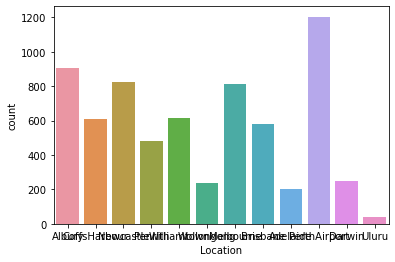

In [26]:
#Let's visualize the count of  Location column.
sns.countplot(x="Location",data=df)
print(df["Location"].value_counts())

Location PerthAirport category is more compared to others.

In [27]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

 13.109145    70
 13.200000    58
 12.000000    57
 14.800000    53
 12.700000    53
              ..
-1.200000      1
-1.500000      1
-1.700000      1
-0.800000      1
 26.000000     1
Name: MinTemp, Length: 286, dtype: int64


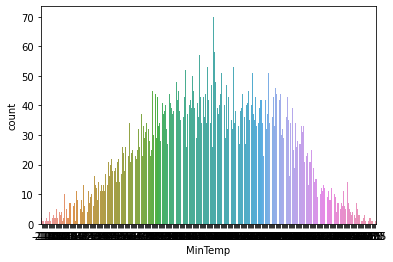

In [28]:
#Let's visualize the count of  MinTemp  column.
sns.countplot(x="MinTemp",data=df)
print(df["MinTemp"].value_counts())

The category 13.109145 is more compared to others.

19.000000    66
19.800000    62
24.098345    57
23.800000    54
22.300000    54
             ..
10.300000     1
10.000000     1
10.400000     1
11.700000     1
43.500000     1
Name: MaxTemp, Length: 332, dtype: int64


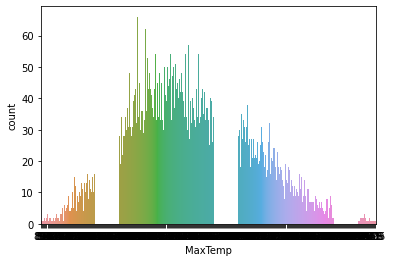

In [29]:
#Let's visualize the count of  MaxTemp column.
sns.countplot(x="MaxTemp",data=df)
print(df["MaxTemp"].value_counts())

The category 19.0000 is more compared to others.

0.000000      4334
0.200000       321
0.400000       144
2.780148       138
0.600000        87
              ... 
73.800000        1
23.800000        1
61.200000        1
128.000000       1
40.000000        1
Name: Rainfall, Length: 251, dtype: int64


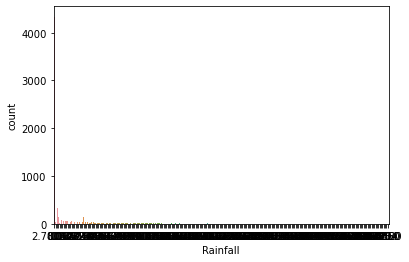

In [30]:
#Let's visualize the count of  Rainfall column.
sns.countplot(x="Rainfall",data=df)
print(df["Rainfall"].value_counts())

The category 0 is more compared to others.

5.302395      2921
4.000000       141
3.000000       125
2.200000       118
2.400000       116
              ... 
145.000000       1
33.800000        1
59.200000        1
20.800000        1
0.700000         1
Name: Evaporation, Length: 117, dtype: int64


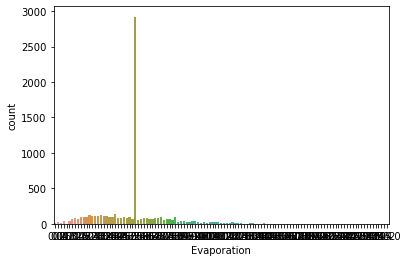

In [31]:
#Let's visualize the count of  Evaporation column.
sns.countplot(x="Evaporation",data=df)
print(df["Evaporation"].value_counts())

The category 5.302395 is more compared to others.

7.890896     3236
0.000000      119
11.100000      61
11.200000      59
11.000000      59
             ... 
2.500000        5
13.600000       4
13.800000       2
13.900000       2
13.500000       1
Name: Sunshine, Length: 141, dtype: int64


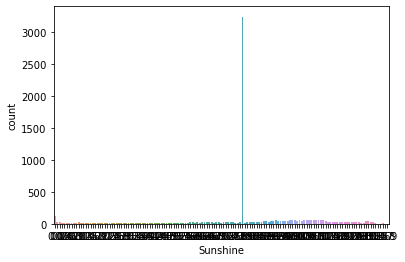

In [32]:
#Let's visualize the count of  Sunshine column.
sns.countplot(x="Sunshine",data=df)
print(df["Sunshine"].value_counts())

The category 7.890896 is more compared to others.

NNE    1112
E       530
SW      478
N       464
W       442
WSW     428
WNW     409
SSE     392
S       381
SE      376
ENE     364
NW      311
SSW     309
NE      305
ESE     272
NNW     189
Name: WindGustDir, dtype: int64


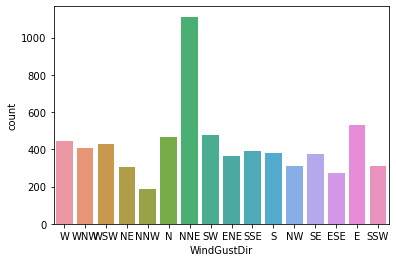

In [33]:
#Let's visualize the count of  WindGustDir column.
sns.countplot(x="WindGustDir",data=df)
print(df["WindGustDir"].value_counts())

The NNE category is more compared to others.

38.977663     942
39.000000     346
35.000000     341
37.000000     332
33.000000     317
31.000000     305
30.000000     302
28.000000     285
41.000000     285
43.000000     237
26.000000     228
24.000000     225
48.000000     211
22.000000     201
46.000000     195
50.000000     191
52.000000     186
44.000000     181
20.000000     170
54.000000     150
19.000000     117
56.000000     111
57.000000     105
17.000000      88
61.000000      83
59.000000      80
63.000000      67
15.000000      57
13.000000      57
65.000000      50
67.000000      42
72.000000      42
69.000000      35
70.000000      35
74.000000      34
76.000000      25
11.000000      18
78.000000      15
80.000000      15
85.000000       9
81.000000       9
9.000000        6
91.000000       6
83.000000       5
93.000000       4
98.000000       4
89.000000       4
94.000000       2
87.000000       2
7.000000        2
102.000000      1
107.000000      1
100.000000      1
Name: WindGustSpeed, dtype: int64


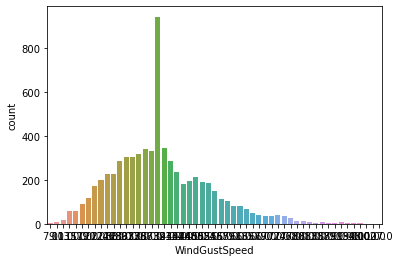

In [34]:
#Let's visualize the count of  WindGustSpeed column.
sns.countplot(x="WindGustSpeed",data=df)
print(df["WindGustSpeed"].value_counts())

The category 38.977663 is more compared to others.

SW     718
N      650
NW     643
SE     501
NE     459
ENE    420
WSW    410
SSW    392
E      375
S      368
NNE    360
W      334
SSE    327
WNW    317
ESE    255
NNW    233
Name: WindDir9am, dtype: int64


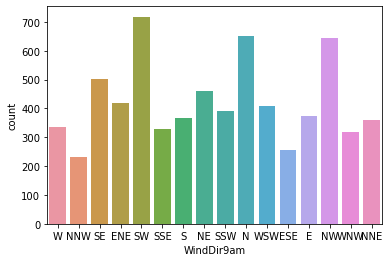

In [35]:
#Let's visualize the count of  WindDir9am column.
sns.countplot(x="WindDir9am",data=df)
print(df["WindDir9am"].value_counts())

The category SW direction is more compared to others.

0.000000     730
9.000000     641
4.000000     595
13.000000    520
7.000000     482
6.000000     459
11.000000    456
17.000000    366
15.000000    344
19.000000    333
20.000000    314
2.000000     240
24.000000    228
22.000000    213
28.000000    169
26.000000    158
31.000000    107
30.000000     81
12.782206     63
35.000000     51
33.000000     50
37.000000     40
41.000000     26
39.000000     21
44.000000     16
46.000000     16
43.000000     16
52.000000      8
56.000000      5
50.000000      5
54.000000      3
48.000000      3
61.000000      1
57.000000      1
63.000000      1
Name: WindSpeed9am, dtype: int64


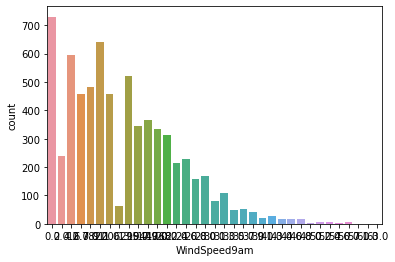

In [36]:
#Let's visualize the count of  WindSpeed9am column.
sns.countplot(x="WindSpeed9am",data=df)
print(df["WindSpeed9am"].value_counts())

The category 0.0000 speed is more compared to others in this column.

9.00000     639
19.00000    509
13.00000    505
11.00000    458
20.00000    452
17.00000    446
15.00000    430
24.00000    383
28.00000    355
22.00000    342
7.00000     293
4.00000     283
26.00000    279
6.00000     220
30.00000    196
0.00000     192
31.00000    176
33.00000    112
17.57115    100
35.00000     93
37.00000     85
2.00000      54
39.00000     49
41.00000     30
46.00000     20
43.00000     20
44.00000     11
50.00000      8
56.00000      6
48.00000      6
52.00000      5
65.00000      1
83.00000      1
54.00000      1
61.00000      1
57.00000      1
Name: WindSpeed3pm, dtype: int64


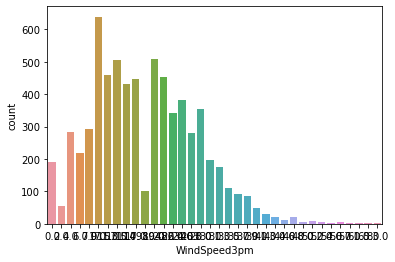

In [37]:
#Let's visualize the count of  WindSpeed3pm column.
sns.countplot(x="WindSpeed3pm",data=df)
print(df["WindSpeed3pm"].value_counts())

The windspeed 9.0000 category is more compared to others.

68.0    163
73.0    161
69.0    152
70.0    148
74.0    148
       ... 
16.0      2
14.0      2
17.0      2
10.0      1
15.0      1
Name: Humidity9am, Length: 91, dtype: int64


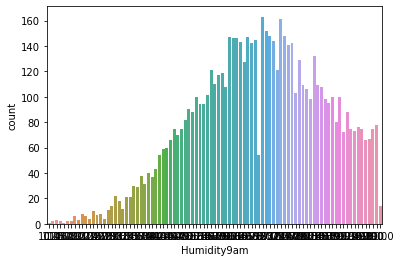

In [38]:
#Let's visualize the count of  Humidity9am column.
sns.countplot(x="Humidity9am",data=df)
print(df["Humidity9am"].value_counts())

The category 68.0 is more compared to others.

46.0    157
51.0    155
54.0    154
49.0    151
52.0    150
       ... 
8.0      10
7.0       7
98.0      6
99.0      3
6.0       3
Name: Humidity3pm, Length: 95, dtype: int64


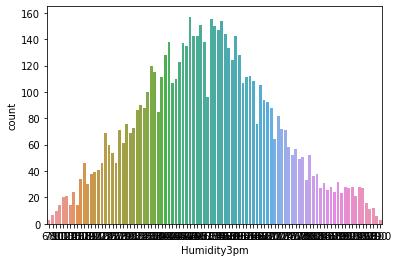

In [39]:
#Let's visualize the count of  Humidity3pm column.
sns.countplot(x="Humidity3pm",data=df)
print(df["Humidity3pm"].value_counts())

The category 46.0 is more compared to others.

1017.626311    1308
1019.200000      42
1018.700000      41
1014.800000      41
1020.000000      40
               ... 
1002.100000       1
993.400000        1
996.500000        1
1035.900000       1
1033.600000       1
Name: Pressure9am, Length: 385, dtype: int64


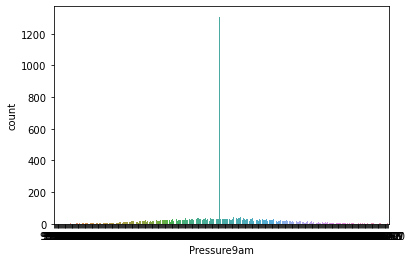

In [40]:
#Let's visualize the count of  Pressure9am column.
sns.countplot(x="Pressure9am",data=df)
print(df["Pressure9am"].value_counts())

The Pressure 1017.626311 category is more compared to others.

1015.119923    1311
1017.800000      46
1018.000000      41
1016.100000      40
1017.900000      39
               ... 
990.800000        1
1028.000000       1
992.400000        1
1035.900000       1
1029.500000       1
Name: Pressure3pm, Length: 375, dtype: int64


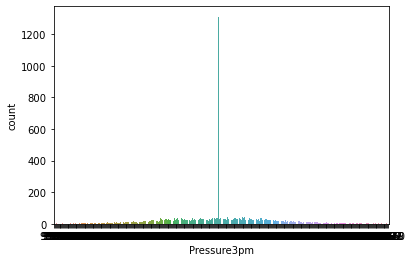

In [41]:
#Let's visualize the count of  Pressure3pm column.
sns.countplot(x="Pressure3pm",data=df)
print(df["Pressure3pm"].value_counts())

The pressure 1015.119923 category is more compared to others.

4.336806    1866
7.000000    1043
1.000000     922
8.000000     764
0.000000     521
6.000000     454
5.000000     341
3.000000     313
2.000000     311
4.000000     227
Name: Cloud9am, dtype: int64


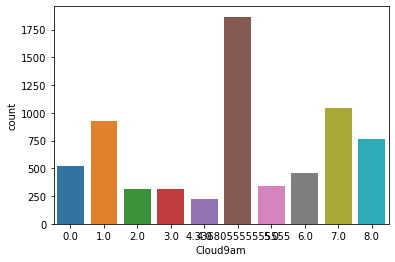

In [42]:
#Let's visualize the count of  Cloud9am column.
sns.countplot(x="Cloud9am",data=df)
print(df["Cloud9am"].value_counts())

The Cloud9am 4.336806 category is more compared to others.

4.320988    1902
7.000000     959
1.000000     921
8.000000     644
6.000000     489
5.000000     433
2.000000     428
3.000000     357
0.000000     332
4.000000     297
Name: Cloud3pm, dtype: int64


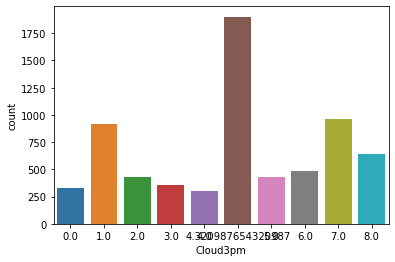

In [43]:
#Let's visualize the count of  Cloud3pm column.
sns.countplot(x="Cloud3pm",data=df)
print(df["Cloud3pm"].value_counts())

The Cloud3pm 4.320988 category is more compared to others.

14.8    62
18.0    61
20.6    57
17.5    54
18.3    52
        ..
2.5      1
2.0      1
3.4      1
5.2      1
30.2     1
Name: Temp9am, Length: 305, dtype: int64


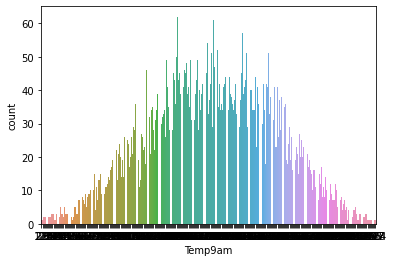

In [44]:
#Let's visualize the count of  Temp9am column.
sns.countplot(x="Temp9am",data=df)
print(df["Temp9am"].value_counts())

The category 14.8 Temp9am is more compared to others 

22.708561    92
19.200000    63
19.000000    61
21.700000    54
22.500000    54
             ..
41.000000     1
38.000000     1
40.300000     1
8.700000      1
42.400000     1
Name: Temp3pm, Length: 329, dtype: int64


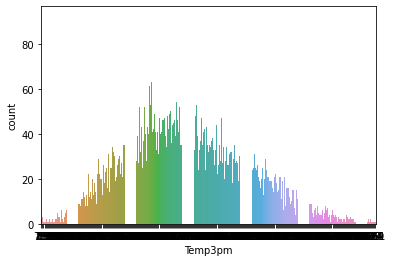

In [45]:
#Let's visualize the count of  Temp3pm column.
sns.countplot(x="Temp3pm",data=df)
print(df["Temp3pm"].value_counts())

The category 22.708561 Temp3pm is more compared to others.

Bivariate Analysis:

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6762 non-null   object 
 1   Location       6762 non-null   object 
 2   MinTemp        6762 non-null   float64
 3   MaxTemp        6762 non-null   float64
 4   Rainfall       6762 non-null   float64
 5   Evaporation    6762 non-null   float64
 6   Sunshine       6762 non-null   float64
 7   WindGustDir    6762 non-null   object 
 8   WindGustSpeed  6762 non-null   float64
 9   WindDir9am     6762 non-null   object 
 10  WindDir3pm     6762 non-null   object 
 11  WindSpeed9am   6762 non-null   float64
 12  WindSpeed3pm   6762 non-null   float64
 13  Humidity9am    6762 non-null   float64
 14  Humidity3pm    6762 non-null   float64
 15  Pressure9am    6762 non-null   float64
 16  Pressure3pm    6762 non-null   float64
 17  Cloud9am       6762 non-null   float64
 18  Cloud3pm

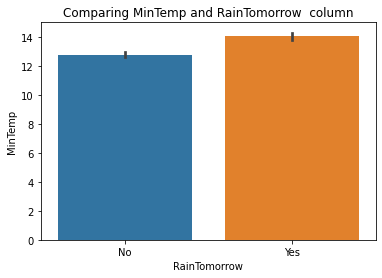

In [49]:
#comparing MinTemp and RainTomorrow column
plt.title("Comparing MinTemp and RainTomorrow  column")
sns.barplot(x="RainTomorrow",y="MinTemp",data=df)
plt.show()

The RainTomorrow chance Yes is more according to MinTemp column.

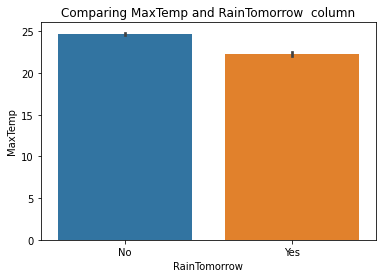

In [50]:
#comparing MaxTemp and RainTomorrow column
plt.title("Comparing MaxTemp and RainTomorrow  column")
sns.barplot(x="RainTomorrow",y="MaxTemp",data=df)
plt.show()

The RainTomorrow chance No is more according to MaxTemp column.

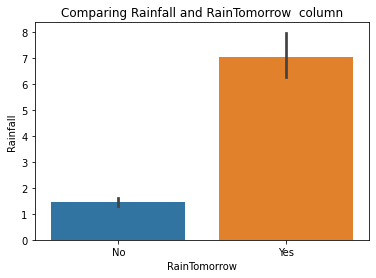

In [51]:
#comparing Rainfall and RainTomorrow column
plt.title("Comparing Rainfall and RainTomorrow  column")
sns.barplot(x="RainTomorrow",y="Rainfall",data=df)
plt.show()

The RainTomorrow chance Yes is more according to Rainfall column.

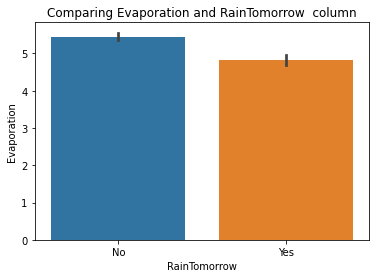

In [52]:
#comparing Evaporation and RainTomorrow column
plt.title("Comparing Evaporation and RainTomorrow  column")
sns.barplot(x="RainTomorrow",y="Evaporation",data=df)
plt.show()

The RainTomorrow chance No is more according to Evaporation column.

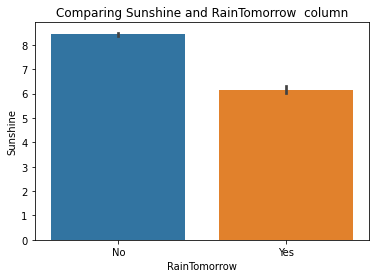

In [53]:
#comparing Sunshine and RainTomorrow column
plt.title("Comparing Sunshine and RainTomorrow  column")
sns.barplot(x="RainTomorrow",y="Sunshine",data=df)
plt.show()

The RainTomorrow chance No is more according to Sunshine column.

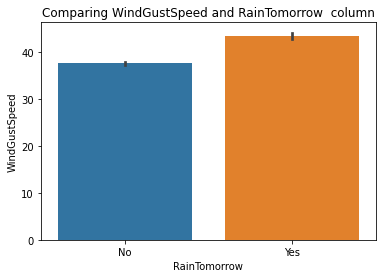

In [54]:
#comparing WindGustSpeed and RainTomorrow column
plt.title("Comparing WindGustSpeed and RainTomorrow  column")
sns.barplot(x="RainTomorrow",y="WindGustSpeed",data=df)
plt.show()

The RainTomorrow chance yes is more according to WindGustSpeed column.

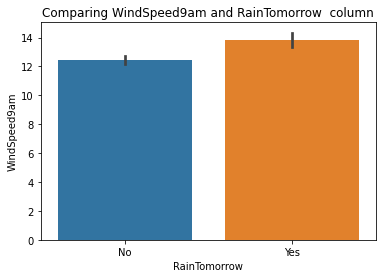

In [55]:
#comparing WindSpeed9am and RainTomorrow column
plt.title("Comparing WindSpeed9am and RainTomorrow  column")
sns.barplot(x="RainTomorrow",y="WindSpeed9am",data=df)
plt.show()

The RainTomorrow chance yes is more according to WindSpeed9am column.

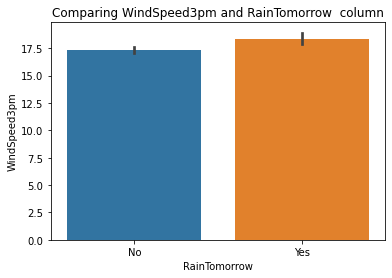

In [56]:
#comparing WindSpeed3pm and RainTomorrow column
plt.title("Comparing WindSpeed3pm and RainTomorrow  column")
sns.barplot(x="RainTomorrow",y="WindSpeed3pm",data=df)
plt.show()

The RainTomorrow chance yes is more according to WindSpeed3pm column.

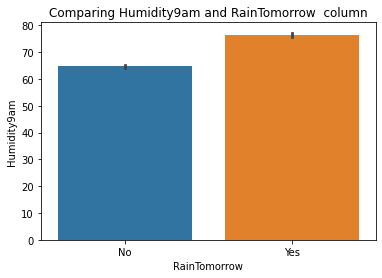

In [57]:
#comparing Humidity9am and RainTomorrow column
plt.title("Comparing Humidity9am and RainTomorrow  column")
sns.barplot(x="RainTomorrow",y="Humidity9am",data=df)
plt.show()

The RainTomorrow chance yes is more according to Humidity9am column.

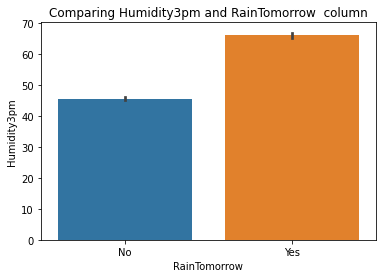

In [58]:
#comparing Humidity3pm and RainTomorrow column
plt.title("Comparing Humidity3pm and RainTomorrow  column")
sns.barplot(x="RainTomorrow",y="Humidity3pm",data=df)
plt.show()

The RainTomorrow chance yes is more according to Humidity3pm column.

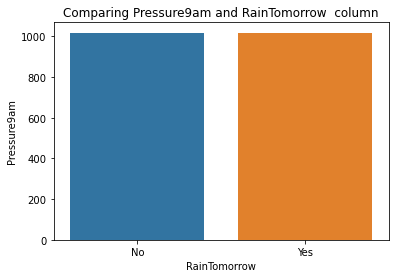

In [59]:
#comparing Pressure9am and RainTomorrow column
plt.title("Comparing Pressure9am and RainTomorrow  column")
sns.barplot(x="RainTomorrow",y="Pressure9am",data=df)
plt.show()

The RainTomorrow yes and No chance are same according to Pressure9am column. 

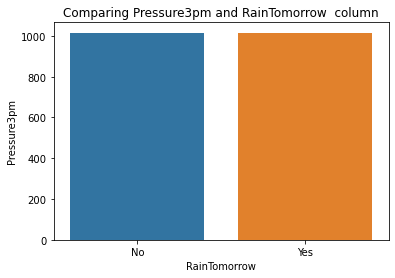

In [60]:
#comparing Pressure3pm and RainTomorrow column
plt.title("Comparing Pressure3pm and RainTomorrow  column")
sns.barplot(x="RainTomorrow",y="Pressure3pm",data=df)
plt.show()

The RainTomorrow yes and No chance are same according to Pressure3pm column.

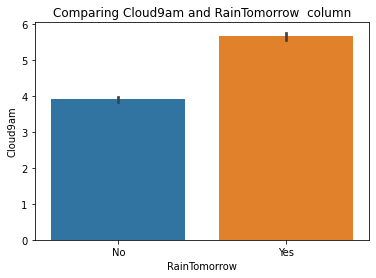

In [61]:
#comparing Cloud9am and RainTomorrow column
plt.title("Comparing Cloud9am and RainTomorrow  column")
sns.barplot(x="RainTomorrow",y="Cloud9am",data=df)
plt.show()

The RainTomorrow chance yes is more according to Cloud9am column.

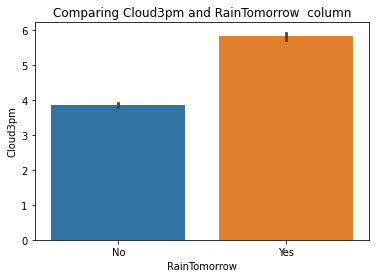

In [62]:
#comparing Cloud3pm and RainTomorrow column
plt.title("Comparing Cloud3pm and RainTomorrow  column")
sns.barplot(x="RainTomorrow",y="Cloud3pm",data=df)
plt.show()

The RainTomorrow chance yes is more according to Cloud3pm column.

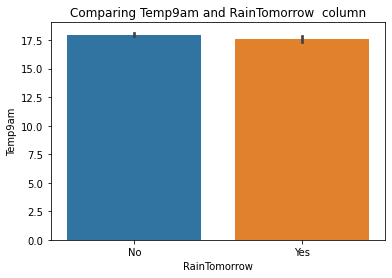

In [63]:
#comparing Temp9am and RainTomorrow column
plt.title("Comparing Temp9am and RainTomorrow  column")
sns.barplot(x="RainTomorrow",y="Temp9am",data=df)
plt.show()

The RainTomorrow chance No is more according to Temp9am column.

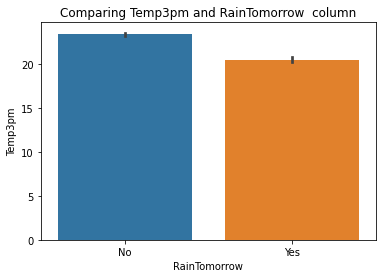

In [64]:
#comparing Temp3pm and RainTomorrow column
plt.title("Comparing Temp3pm and RainTomorrow  column")
sns.barplot(x="RainTomorrow",y="Temp3pm",data=df)
plt.show()

The RainTomorrow chance No is more according to Temp3pm column.

In [19]:
#Encoding categorical columns using Label Encoder
from sklearn.preprocessing import LabelEncoder
lab_encoder=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=lab_encoder.fit_transform(df[i])
df        

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,13.4,22.900000,0.843433,1.743776,1.990866,13,3.530348,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,0,0
1,1,1,7.4,25.100000,0.000000,1.743776,1.990866,14,3.530348,6,...,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,0,0
2,2,1,12.9,25.700000,0.000000,1.743776,1.990866,15,3.583048,13,...,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,0,0
3,3,1,9.2,28.000000,0.000000,1.743776,1.990866,4,2.884499,9,...,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,0,0
4,4,1,17.5,32.300000,1.000000,1.743776,1.990866,13,3.448217,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999,9,2.8,23.400000,0.000000,1.743776,1.990866,0,3.141381,9,...,51.0,24.0,1024.6,1020.3,4.336806,4.320988,10.1,22.4,0,0
8421,3000,9,3.6,25.300000,0.000000,1.743776,1.990866,6,2.802039,9,...,56.0,21.0,1023.5,1019.1,4.336806,4.320988,10.9,24.5,0,0
8422,3001,9,5.4,26.900000,0.000000,1.743776,1.990866,3,3.332222,9,...,53.0,24.0,1021.0,1016.8,4.336806,4.320988,12.5,26.1,0,0
8423,3002,9,7.8,27.000000,0.000000,1.743776,1.990866,9,3.036589,10,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0


In [20]:
df.dtypes

Date               int32
Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
dtype: object

In [21]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")

In [22]:
df.dtypes

Date             datetime64[ns]
Location                  int32
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir               int32
WindGustSpeed           float64
WindDir9am                int32
WindDir3pm                int32
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                 int32
RainTomorrow              int32
dtype: object

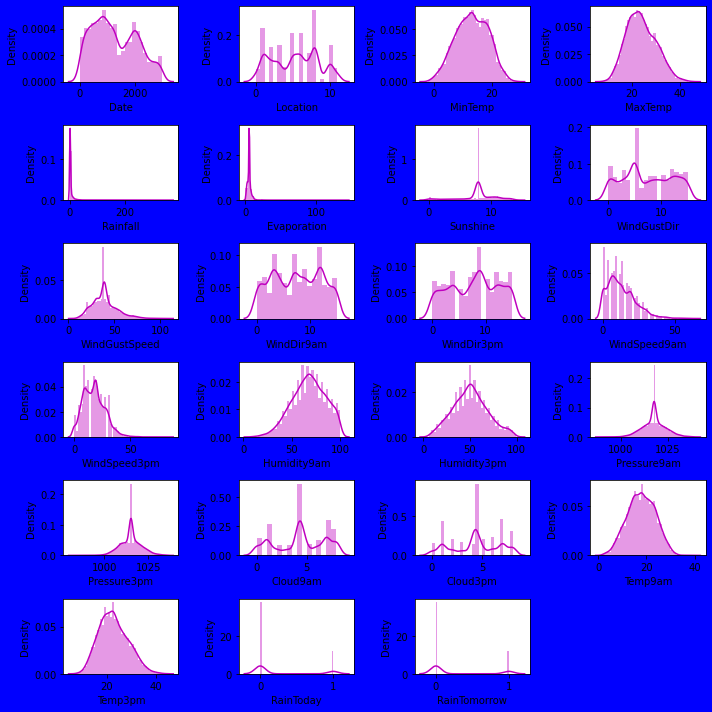

In [69]:
#let's visualize how the data has been distributed in all  the columns.
plt.figure(figsize=(10,10),facecolor="blue")
plotnumber=1
for column in df.columns:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
    plt.tight_layout()

The columns Rainfall, Sunshine, Evaporation, WindSpeed9am, WindSpeed3pm columns is right skewed. 

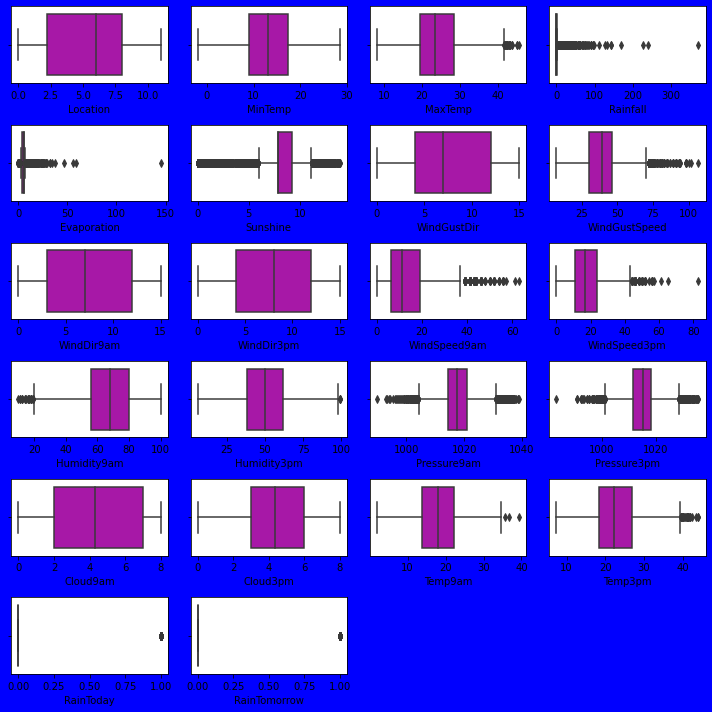

In [71]:
#let's visualize how the outliers present in all  the columns.
plt.figure(figsize=(10,10),facecolor="blue")
a=df[["Location","MinTemp","MaxTemp","Rainfall","Evaporation","Sunshine","WindGustDir","WindGustSpeed","WindDir9am","WindDir3pm","WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm" ,"Cloud9am","Cloud3pm","Temp9am" ,"Temp3pm" ,"RainToday","RainTomorrow"]]
plotnumber=1
for column in a:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(a[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
    plt.tight_layout()

The columns MaxTemp,Rainfall, Evaporation,Sunshine,WindGustSpeed, WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm , Pressure9am, Pressure3pm,Temp9am, Temp3pm,RainToday,RainTomorrow have outliers.

In [77]:
from scipy.stats import zscore
a=df[["Location","MinTemp","MaxTemp","Rainfall","Evaporation","Sunshine","WindGustDir","WindGustSpeed","WindDir9am","WindDir3pm","WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm" ,"Cloud9am","Cloud3pm","Temp9am" ,"Temp3pm" ,"RainToday","RainTomorrow"]]
z_score=(zscore(a))
b=np.abs(z_score)
b

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1.395097,0.052498,1.954990e-01,0.207990,5.312920e-16,2.924379e-15,1.216001,3.754887e-01,1.210804,1.362911,...,0.203327,1.539016,1.646846,1.344002,1.480398,0.000000,0.173897,0.152152,0.559245,0.559245
1,1.395097,1.030484,1.634110e-01,0.265231,5.312920e-16,2.924379e-15,1.431614,3.754887e-01,0.341951,1.583368,...,1.368138,1.376828,1.165715,1.226694,0.000000,0.000000,0.121468,0.266510,0.559245,0.559245
2,1.395097,0.037750,2.612956e-01,0.265231,5.312920e-16,2.924379e-15,1.647227,5.250161e-01,1.210804,1.583368,...,1.717352,1.106513,1.663437,1.075869,0.000000,0.999089,0.542637,0.082299,0.559245,0.559245
3,1.395097,0.705589,6.365197e-01,0.265231,5.312920e-16,2.924379e-15,0.724512,1.119786e+00,0.323515,1.723493,...,1.309935,1.863394,0.004365,0.388779,0.000000,0.000000,0.035820,0.634933,0.559245,0.559245
4,1.395097,0.792536,1.338026e+00,0.169829,5.312920e-16,2.924379e-15,1.216001,1.511975e-01,1.451062,0.180291,...,0.843553,0.944325,1.132534,1.528343,1.076270,1.583662,0.016609,1.170820,0.559245,0.559245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.186193,1.860770,1.139286e-01,0.265231,5.312920e-16,2.924379e-15,1.586962,5.964399e-01,0.323515,1.503036,...,0.960721,1.430891,1.156985,0.868092,0.000000,0.000000,1.362295,0.051673,0.559245,0.559245
8421,1.186193,1.716373,1.960392e-01,0.265231,5.312920e-16,2.924379e-15,0.293287,1.269314e+00,0.323515,1.062121,...,0.669709,1.593079,0.974487,0.666993,0.000000,0.000000,1.222484,0.300003,0.559245,0.559245
8422,1.186193,1.391478,4.570647e-01,0.265231,5.312920e-16,2.924379e-15,0.940124,1.478575e-01,0.323515,1.362911,...,0.844316,1.430891,0.559719,0.281552,0.000000,0.000000,0.942861,0.567947,0.559245,0.559245
8423,1.186193,0.958285,4.733788e-01,0.265231,5.312920e-16,2.924379e-15,0.353551,8.207311e-01,0.545337,1.062121,...,0.960721,1.430891,0.294268,0.231277,0.540240,0.999089,0.488473,0.551200,0.559245,0.559245


In [73]:
#The data where the outliers are present
np.where(b>3)

(array([   8,   12,   12,   44,   44,   52,   52,   60,   60,   61,   61,
          62,   62,   62,   67,   68,   68,  123,  267,  271,  296,  381,
         381,  405,  406,  407,  431,  462,  466,  466,  563,  567,  568,
         568,  569,  602,  602,  603,  683,  683,  699,  713,  748,  748,
         770,  795,  796,  797,  802,  928,  928,  935,  949,  979,  980,
         980,  980, 1008, 1009, 1011, 1138, 1148, 1149, 1151, 1189, 1203,
        1237, 1241, 1264, 1265, 1357, 1411, 1412, 1413, 1479, 1480, 1481,
        1513, 1535, 1587, 1644, 1661, 1665, 1673, 1680, 1774, 1819, 1873,
        1898, 1903, 1945, 2016, 2028, 2043, 2074, 2108, 2116, 2186, 2201,
        2219, 2219, 2230, 2231, 2265, 2429, 2488, 2500, 2505, 2527, 2527,
        2541, 2593, 2676, 2677, 2735, 2827, 2835, 2849, 2849, 2855, 2859,
        2863, 2869, 2877, 2883, 2890, 2891, 2897, 2898, 2900, 2900, 2901,
        2905, 2909, 2911, 2919, 2925, 2933, 2939, 2947, 2953, 2961, 2967,
        2975, 2989, 3003, 3027, 3045, 

In [74]:
#Now removing the data above zscore
df1=df[(b<3).all(axis=1)]
df1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1970-01-01 00:00:00.000000000,1,13.4,22.900000,0.6,5.302395,7.890896,13,44.000000,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,0,0
1,1970-01-01 00:00:00.000000001,1,7.4,25.100000,0.0,5.302395,7.890896,14,44.000000,6,...,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,0,0
2,1970-01-01 00:00:00.000000002,1,12.9,25.700000,0.0,5.302395,7.890896,15,46.000000,13,...,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,0,0
3,1970-01-01 00:00:00.000000003,1,9.2,28.000000,0.0,5.302395,7.890896,4,24.000000,9,...,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,0,0
4,1970-01-01 00:00:00.000000004,1,17.5,32.300000,1.0,5.302395,7.890896,13,41.000000,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1970-01-01 00:00:00.000002999,9,2.8,23.400000,0.0,5.302395,7.890896,0,31.000000,9,...,51.0,24.0,1024.6,1020.3,4.336806,4.320988,10.1,22.4,0,0
8421,1970-01-01 00:00:00.000003000,9,3.6,25.300000,0.0,5.302395,7.890896,6,22.000000,9,...,56.0,21.0,1023.5,1019.1,4.336806,4.320988,10.9,24.5,0,0
8422,1970-01-01 00:00:00.000003001,9,5.4,26.900000,0.0,5.302395,7.890896,3,37.000000,9,...,53.0,24.0,1021.0,1016.8,4.336806,4.320988,12.5,26.1,0,0
8423,1970-01-01 00:00:00.000003002,9,7.8,27.000000,0.0,5.302395,7.890896,9,28.000000,10,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0


In [75]:
print("Data loss percentage:",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage: 5.220349009168885


Data loss percentage after removing outliers is 5.22%

In [78]:
#checking skewness in all the columns.
df.skew()

Location         -0.000009
MinTemp          -0.083706
MaxTemp           0.327598
Rainfall         13.650294
Evaporation      13.553368
Sunshine         -0.882147
WindGustDir       0.073316
WindGustSpeed     0.780437
WindDir9am       -0.022331
WindDir3pm       -0.103832
WindSpeed9am      0.957036
WindSpeed3pm      0.549797
Humidity9am      -0.256177
Humidity3pm       0.150860
Pressure9am       0.022085
Pressure3pm       0.042990
Cloud9am         -0.215085
Cloud3pm         -0.162159
Temp9am          -0.047213
Temp3pm           0.348100
RainToday         1.229153
RainTomorrow      1.229153
dtype: float64

skewness is present in Rainfall,Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, RainToday, RainTomorrow columns.Let us remove skewness using cbrt method and no need to remove skewness in RainTomorrow target column.

In [80]:
#Let us remove skewness using cbrt method.
df["Rainfall"]=np.cbrt(df["Rainfall"])
df["Evaporation"]=np.cbrt(df["Evaporation"])
df["Sunshine"]=np.cbrt(df["Sunshine"])
df["WindGustSpeed"]=np.cbrt(df["WindGustSpeed"])
df["WindSpeed9am"]=np.cbrt(df["WindSpeed9am"])
df["RainToday"]=np.cbrt(df["RainToday"])

In [81]:
#Again checking skewness in all the columns.
df.skew()

Location        -0.000009
MinTemp         -0.083706
MaxTemp          0.327598
Rainfall         1.688052
Evaporation     -0.042985
Sunshine        -3.044226
WindGustDir      0.073316
WindGustSpeed   -0.035010
WindDir9am      -0.022331
WindDir3pm      -0.103832
WindSpeed9am    -1.122533
WindSpeed3pm     0.549797
Humidity9am     -0.256177
Humidity3pm      0.150860
Pressure9am      0.022085
Pressure3pm      0.042990
Cloud9am        -0.215085
Cloud3pm        -0.162159
Temp9am         -0.047213
Temp3pm          0.348100
RainToday        1.229153
RainTomorrow     1.229153
dtype: float64

still some skewness is present in Rainfall, Sunshine, WindSpeed9am, RainToday columns.

In [82]:
#correlation between Dependent variables and independent variable
df.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,1.000000,0.090425,0.070878,0.010377,0.127156,0.063281,-0.057569,0.276352,-0.093277,-0.002495,...,-0.033657,-0.001483,-0.037657,-0.024508,-0.008566,-0.010776,0.098533,0.066331,-0.002186,-0.002410
MinTemp,0.090425,1.000000,0.728065,0.101617,0.333271,-0.026167,-0.161528,0.267448,-0.071138,-0.145036,...,-0.154248,0.067683,-0.441253,-0.440363,0.095403,0.047495,0.891425,0.696419,0.074487,0.097330
MaxTemp,0.070878,0.728065,1.000000,-0.222646,0.436617,0.275641,-0.229601,0.185392,-0.235611,-0.162925,...,-0.424951,-0.430526,-0.337845,-0.413150,-0.245116,-0.241542,0.866584,0.974695,-0.228053,-0.163967
Rainfall,0.010377,0.101617,-0.222646,1.000000,-0.152570,-0.279004,0.123826,0.105773,0.177804,0.093181,...,0.423268,0.412276,-0.131729,-0.055814,0.333127,0.283771,-0.080810,-0.233395,0.864908,0.370869
Evaporation,0.127156,0.333271,0.436617,-0.152570,1.000000,0.307599,-0.121166,0.174656,-0.095102,-0.032139,...,-0.294734,-0.233290,-0.256328,-0.274691,-0.093941,-0.141825,0.392585,0.427794,-0.169484,-0.103429
Sunshine,0.063281,-0.026167,0.275641,-0.279004,0.307599,1.000000,-0.060424,-0.004436,-0.054685,-0.020920,...,-0.291307,-0.407544,0.015242,-0.027836,-0.448732,-0.470487,0.143081,0.291715,-0.234063,-0.326718
WindGustDir,-0.057569,-0.161528,-0.229601,0.123826,-0.121166,-0.060424,1.000000,0.010760,0.361401,0.517587,...,0.054906,0.060891,-0.117026,-0.032932,0.111870,0.082675,-0.182103,-0.243325,0.121302,0.045256
WindGustSpeed,0.276352,0.267448,0.185392,0.105773,0.174656,-0.004436,0.010760,1.000000,-0.121378,0.089974,...,-0.285577,-0.098288,-0.387462,-0.354655,0.005270,0.050947,0.250900,0.150338,0.087974,0.175111
WindDir9am,-0.093277,-0.071138,-0.235611,0.177804,-0.095102,-0.054685,0.361401,-0.121378,1.000000,0.225790,...,0.106798,0.172629,-0.001293,0.077296,0.103431,0.071772,-0.132263,-0.241454,0.162443,0.045552
WindDir3pm,-0.002495,-0.145036,-0.162925,0.093181,-0.032139,-0.020920,0.517587,0.089974,0.225790,1.000000,...,-0.010543,-0.016463,-0.136033,-0.047384,0.064222,0.043957,-0.150258,-0.172964,0.092028,0.003024


This gives the correlation between dependent and independent features.

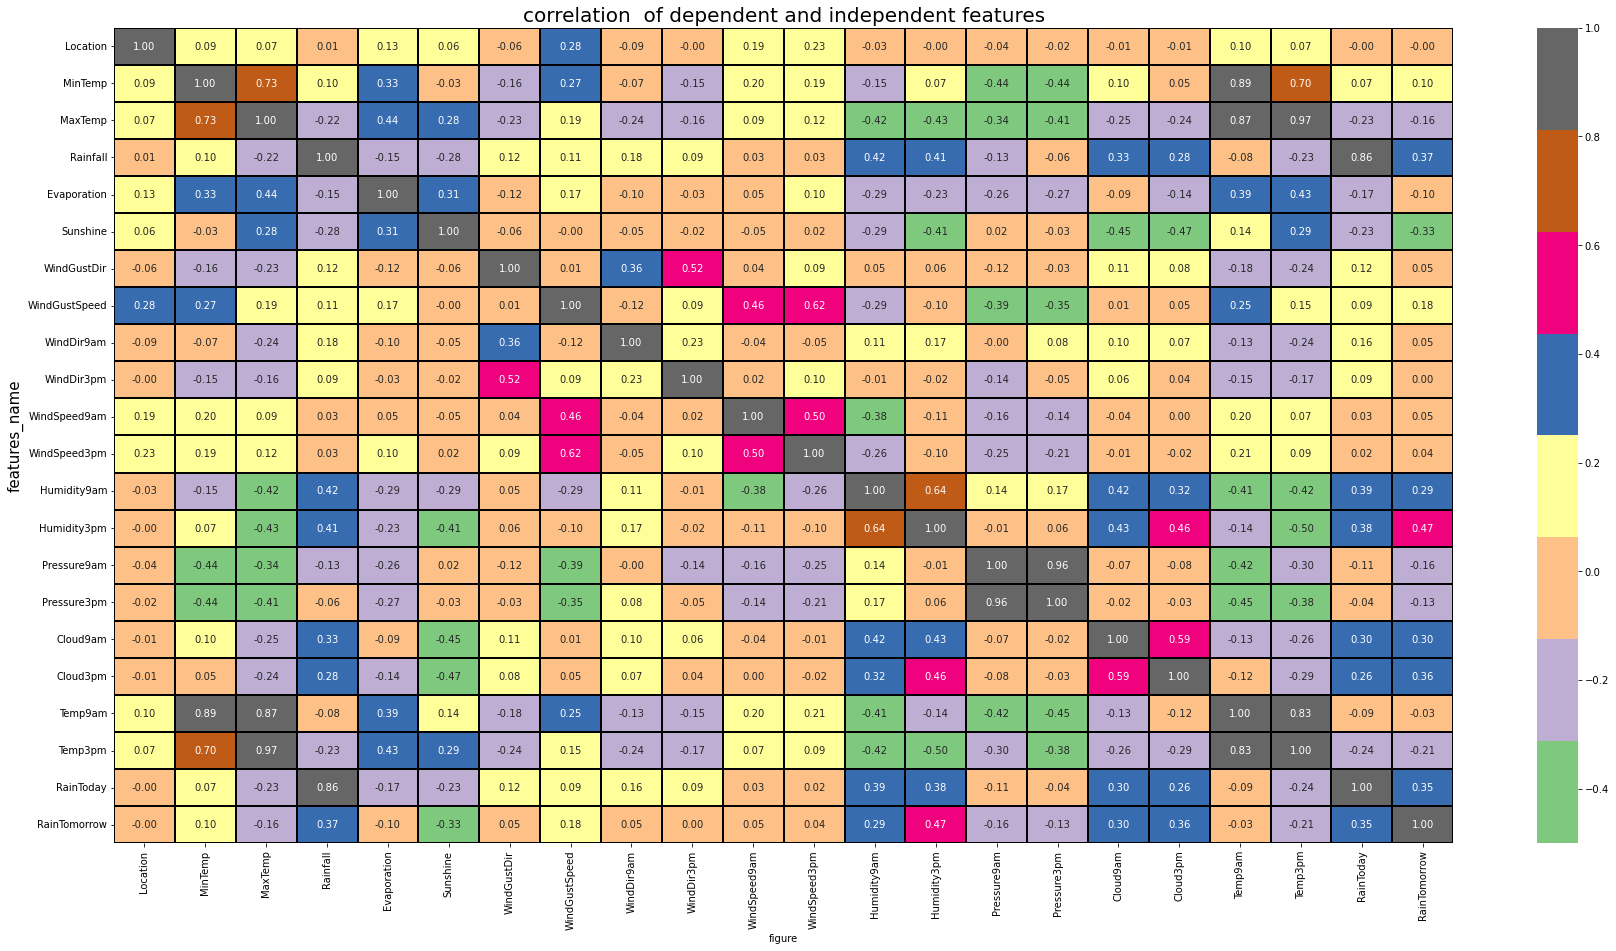

In [83]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), annot=True,fmt="0.2f",linewidth=0.2,linecolor="black",cmap="Accent")
plt.xlabel('figure',fontsize=10)
plt.ylabel("features_name",fontsize=15)
plt.title("correlation  of dependent and independent features",fontsize=20)
plt.show()

In [84]:
df.corr()['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.470481
Rainfall         0.370869
Cloud3pm         0.363028
RainToday        0.345660
Cloud9am         0.301707
Humidity9am      0.294038
WindGustSpeed    0.175111
MinTemp          0.097330
WindSpeed9am     0.051469
WindDir9am       0.045552
WindGustDir      0.045256
WindSpeed3pm     0.044663
WindDir3pm       0.003024
Location        -0.002410
Temp9am         -0.028916
Evaporation     -0.103429
Pressure3pm     -0.129945
Pressure9am     -0.158642
MaxTemp         -0.163967
Temp3pm         -0.207344
Sunshine        -0.326718
Name: RainTomorrow, dtype: float64

we can observe the positive correlated features and negative correlated features also

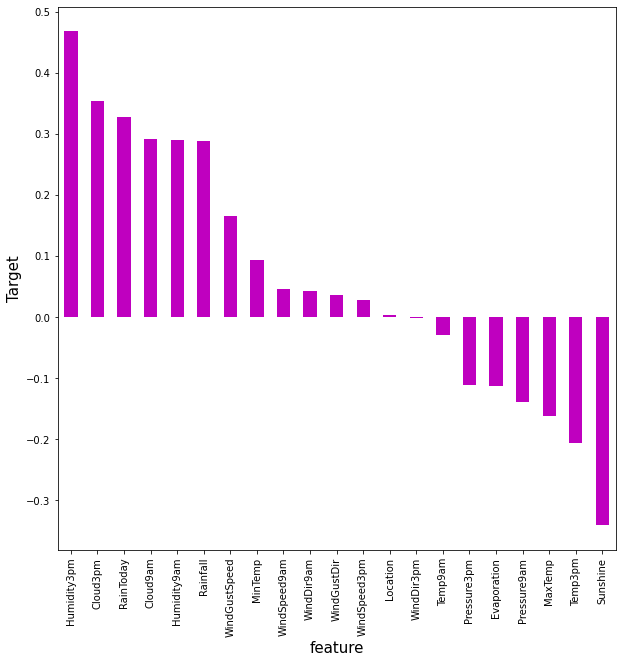

In [86]:
#visualizing the correlation between features and target
plt.figure(figsize=(10,10))
df1.corr()['RainTomorrow'].sort_values(ascending=False).drop(["RainTomorrow"]).plot(kind="bar",color="m")
plt.xlabel('feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.show()

In [93]:
#Seperating Features and label
df.drop("Date",axis=1,inplace=True)
x=df.drop("RainTomorrow",axis=1)
y=df["RainTomorrow"]

In [94]:
x.shape

(6762, 21)

In [95]:
y.shape

(6762,)

In [96]:
y.value_counts()

0    5151
1    1611
Name: RainTomorrow, dtype: int64

Feature scaling using RobustScaler:

In [97]:
from sklearn.preprocessing import RobustScaler
p=RobustScaler()
x=pd.DataFrame(p.fit_transform(x),columns=x.columns)
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,-0.869565,0.034626,-0.068182,0.793701,0.0,0.0,0.750,0.293779,0.666667,0.750,...,0.538462,0.125000,-1.166667,-1.481539,-1.162308,0.732639,0.000000,-0.120482,-0.059524,0.0
1,-0.869565,-0.679660,0.181818,0.000000,0.0,0.0,0.875,0.293779,-0.111111,0.875,...,0.384615,-1.000000,-1.041667,-1.048703,-1.060858,0.000000,0.000000,-0.084337,0.238095,0.0
2,-0.869565,-0.024898,0.250000,0.000000,0.0,0.0,1.000,0.404535,0.666667,0.875,...,0.692308,-1.250000,-0.833333,-1.496464,-0.930424,0.000000,-0.773663,0.373494,0.107143,0.0
3,-0.869565,-0.465374,0.511364,0.000000,0.0,0.0,-0.375,-1.063574,0.222222,-1.000,...,-0.615385,-0.958333,-1.416667,-0.003927,-0.336221,0.000000,0.000000,0.024096,0.500000,0.0
4,-0.869565,0.522721,1.000000,0.941036,0.0,0.0,0.750,0.121167,-0.666667,-0.125,...,0.230769,0.583333,-0.708333,-1.018852,-1.321728,0.532639,1.226337,-0.012048,0.880952,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,0.521739,-1.227279,-0.011364,0.000000,0.0,0.0,-0.875,-0.523697,0.222222,-0.875,...,-0.461538,-0.708333,-1.083333,1.040849,0.750736,0.000000,0.000000,-0.939759,0.011905,0.0
6758,0.521739,-1.132041,0.204545,0.000000,0.0,0.0,-0.125,-1.236876,0.222222,-0.625,...,-0.615385,-0.500000,-1.208333,0.876670,0.576823,0.000000,0.000000,-0.843373,0.261905,0.0
6759,0.521739,-0.917755,0.386364,0.000000,0.0,0.0,-0.500,-0.122615,0.222222,0.750,...,-0.615385,-0.625000,-1.083333,0.503536,0.243489,0.000000,0.000000,-0.650602,0.452381,0.0
6760,0.521739,-0.632041,0.397727,0.000000,0.0,0.0,0.250,-0.743933,0.333333,-0.625,...,-0.769231,-0.708333,-1.083333,0.264730,0.200011,-0.267361,-0.773663,-0.337349,0.440476,0.0


Checking Variance Inflation Factor:

In [98]:
#Finding variance inflation factor in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,1.196255,Location
1,8.624899,MinTemp
2,25.852145,MaxTemp
3,5.555407,Rainfall
4,1.444208,Evaporation
5,1.609558,Sunshine
6,1.597570,WindGustDir
7,2.102972,WindGustSpeed
8,1.309192,WindDir9am
9,1.480175,WindDir3pm


By checking the vif values, we can find the features causing multi collinearity problem.Here we can find the feature MaxTemp,Pressure9am,Pressure3pm, Temp9am, Temp3pm with high vif value .so, we will drop the column Temp3pm with high vif value. 

In [99]:
x.drop("Temp3pm",axis=1,inplace=True)

In [100]:
# Again Finding variance inflation factor in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,1.195750,Location
1,8.541774,MinTemp
2,8.705487,MaxTemp
3,5.547697,Rainfall
4,1.442416,Evaporation
5,1.606880,Sunshine
6,1.592863,WindGustDir
7,2.093687,WindGustSpeed
8,1.308867,WindDir9am
9,1.480148,WindDir3pm


still Pressure9am column has high vif value,so we will drop the Pressure9am column.

In [101]:
x.drop("Pressure9am",axis=1,inplace=True)

In [102]:
# Again Finding variance inflation factor in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,1.195207,Location
1,8.400938,MinTemp
2,8.303635,MaxTemp
3,5.538063,Rainfall
4,1.435175,Evaporation
5,1.606880,Sunshine
6,1.571747,WindGustDir
7,2.078852,WindGustSpeed
8,1.289379,WindDir9am
9,1.412121,WindDir3pm


Here we are taking threshold value as 15, and now multi collinearity is solved.we can now move ahead for model building.

In [103]:
y.value_counts()

0    5151
1    1611
Name: RainTomorrow, dtype: int64

Here we can see that the data is not balanced, since it is a classification problem we will balance the data using Random OverSampling method.

OverSampling the data:

In [104]:
from imblearn.over_sampling import RandomOverSampler
R=RandomOverSampler()
x1,y1=R.fit_resample(x,y)

In [105]:
#Checking value counts of target column
y1.value_counts()

0    5151
1    5151
Name: RainTomorrow, dtype: int64

Now the data is balanced.Now we can build machine learning classification models.

Modelling:

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [107]:
#creating train test split.
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=200)

In [108]:
def m_score(name,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=name.predict(x_train)
        print("Training result")
        print(f"Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    else:
         if train==False:
            pred=name.predict(x_test)
            print("\n----Test Result----")
            print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
            print("confusion_matrix:\n\n",confusion_matrix(y_test,pred))
            print("\n Test classification report:\n\n",classification_report(y_test,pred,digits=2))


In [109]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [110]:
#Model initiation for RandomForestClassifier
name=RandomForestClassifier()
name.fit(x_train,y_train)

RandomForestClassifier()

In [111]:
m_score(name,x_train,x_test,y_train,y_test,train=True)
m_score(name,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:100.00%

----Test Result----
Accuracy score:93.98%
confusion_matrix:

 [[1166  127]
 [  28 1255]]

 Test classification report:

               precision    recall  f1-score   support

           0       0.98      0.90      0.94      1293
           1       0.91      0.98      0.94      1283

    accuracy                           0.94      2576
   macro avg       0.94      0.94      0.94      2576
weighted avg       0.94      0.94      0.94      2576



The accuracy score using RandomForestClassifier is 93.98%=94%

Finding the best random state:

In [112]:
mAccuracy=0
mRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=i)
    pred=name.predict(x_test)
    Test_result=accuracy_score(y_test,pred)
    if Test_result>mAccuracy:
        mAccuracy=Test_result
        mRS=i
print("Best accuracy is",mAccuracy,"at random state",mRS)    

Best accuracy is 0.9902950310559007 at random state 13


In [113]:
#checking cv score for RandomForestClassifier
score=cross_val_score(name,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score.mean())

[0.76952935 0.61135371 0.66213592 0.81504854 0.93252427]
0.7581183608673328
Difference between Accuracy score and cross validation score is: 0.22674188757987224


In [114]:
#Model initiation for SupportVectorMachineClassifier
name1=SVC()
name1.fit(x_train,y_train)

SVC()

In [115]:
m_score(name1,x_train,x_test,y_train,y_test,train=True)
m_score(name1,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:80.90%

----Test Result----
Accuracy score:80.09%
confusion_matrix:

 [[1008  282]
 [ 231 1055]]

 Test classification report:

               precision    recall  f1-score   support

           0       0.81      0.78      0.80      1290
           1       0.79      0.82      0.80      1286

    accuracy                           0.80      2576
   macro avg       0.80      0.80      0.80      2576
weighted avg       0.80      0.80      0.80      2576



The accuracy score using SVC is 80.09%

In [116]:
#checking cv score for SupportVectorMachineClassifier
score1=cross_val_score(name1,x1,y1)
print(score1)
print(score1.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score1.mean())

[0.70645318 0.59728287 0.63495146 0.77087379 0.81990291]
0.7058928411601494
Difference between Accuracy score and cross validation score is: 0.2789674072870556


In [117]:
#Model initiation for GradientBoostingClassifier
name2=GradientBoostingClassifier()
name2.fit(x_train,y_train)

GradientBoostingClassifier()

In [118]:
m_score(name2,x_train,x_test,y_train,y_test,train=True)
m_score(name2,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:83.45%

----Test Result----
Accuracy score:81.13%
confusion_matrix:

 [[1029  261]
 [ 225 1061]]

 Test classification report:

               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1290
           1       0.80      0.83      0.81      1286

    accuracy                           0.81      2576
   macro avg       0.81      0.81      0.81      2576
weighted avg       0.81      0.81      0.81      2576



The accuracy using GradientBoostingClassifier is 81.13%

In [119]:
#checking cv score for GradientBoostingClassifier
score2=cross_val_score(name2,x1,y1)
print(score2)
print(score2.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score2.mean())

[0.55749636 0.47646773 0.56941748 0.65873786 0.77815534]
0.6080549549422234
Difference between Accuracy score and cross validation score is: 0.3768052935049816


In [120]:
#Model initiation for AdaBoostClassifier
name3=AdaBoostClassifier()
name3.fit(x_train,y_train)

AdaBoostClassifier()

In [121]:
m_score(name3,x_train,x_test,y_train,y_test,train=True)
m_score(name3,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:78.75%

----Test Result----
Accuracy score:78.22%
confusion_matrix:

 [[1004  286]
 [ 275 1011]]

 Test classification report:

               precision    recall  f1-score   support

           0       0.78      0.78      0.78      1290
           1       0.78      0.79      0.78      1286

    accuracy                           0.78      2576
   macro avg       0.78      0.78      0.78      2576
weighted avg       0.78      0.78      0.78      2576



The accuracy using AdaBoostClassifier is 78.22%

In [122]:
#checking cv score for AdaBoostClassifier
score3=cross_val_score(name3,x1,y1)
print(score3)
print(score3.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score3.mean())

[0.49490539 0.44735565 0.54271845 0.62427184 0.74223301]
0.5702968678603562
Difference between Accuracy score and cross validation score is: 0.41456338058684883


In [123]:
#Model initiation for DecisionTreeClassifier
name4=DecisionTreeClassifier()
name4.fit(x_train,y_train)

DecisionTreeClassifier()

In [124]:
m_score(name4,x_train,x_test,y_train,y_test,train=True)
m_score(name4,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:100.00%

----Test Result----
Accuracy score:88.78%
confusion_matrix:

 [[1048  242]
 [  47 1239]]

 Test classification report:

               precision    recall  f1-score   support

           0       0.96      0.81      0.88      1290
           1       0.84      0.96      0.90      1286

    accuracy                           0.89      2576
   macro avg       0.90      0.89      0.89      2576
weighted avg       0.90      0.89      0.89      2576



The accuracy using DecisionTreeClassifier is 88.78%

In [125]:
#checking cv score for DecisionTreeClassifier
score4=cross_val_score(name4,x1,y1)
print(score4)
print(score4.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score4.mean())

[0.80543426 0.67297428 0.69174757 0.80631068 0.90533981]
0.7763613195592676
Difference between Accuracy score and cross validation score is: 0.20849892888793742


In [126]:
#Model initiation for ExtraTreesClassifier
name5=ExtraTreesClassifier()
name5.fit(x_train,y_train)

ExtraTreesClassifier()

In [127]:
m_score(name5,x_train,x_test,y_train,y_test,train=True)
m_score(name5,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:100.00%

----Test Result----
Accuracy score:95.26%
confusion_matrix:

 [[1208   82]
 [  40 1246]]

 Test classification report:

               precision    recall  f1-score   support

           0       0.97      0.94      0.95      1290
           1       0.94      0.97      0.95      1286

    accuracy                           0.95      2576
   macro avg       0.95      0.95      0.95      2576
weighted avg       0.95      0.95      0.95      2576



The accuracy using ExtraTreeClassifier is 95.26%

In [128]:
#checking cv score for ExtraTreesClassifier
score5=cross_val_score(name5,x1,y1)
print(score5)
print(score5.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score5.mean())

[0.8214459  0.6787967  0.72815534 0.90339806 0.94757282]
0.8158737628543029
Difference between Accuracy score and cross validation score is: 0.16898648559290208


In [129]:
#Model initiation for BaggingClassifier
name6=BaggingClassifier()
name6.fit(x_train,y_train)

BaggingClassifier()

In [130]:
m_score(name6,x_train,x_test,y_train,y_test,train=True)
m_score(name6,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:99.79%

----Test Result----
Accuracy score:91.89%
confusion_matrix:

 [[1137  153]
 [  56 1230]]

 Test classification report:

               precision    recall  f1-score   support

           0       0.95      0.88      0.92      1290
           1       0.89      0.96      0.92      1286

    accuracy                           0.92      2576
   macro avg       0.92      0.92      0.92      2576
weighted avg       0.92      0.92      0.92      2576



The accuracy using Bagging classifier is 91.89%=92%

In [131]:
#checking cv score for BaggingClassifier
score6=cross_val_score(name6,x1,y1)
print(score6)
print(score6.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score6.mean())

[0.76855895 0.61669093 0.67378641 0.81553398 0.93495146]
0.761904344671971
Difference between Accuracy score and cross validation score is: 0.222955903775234


ExtraTreesClassifier is our best model,as the difference between accuracy score and cv score is least.

ExtraTreesClassifier is our best model and we will do Hyper parameter tuning for this model.

Hyper Parameter Tuning:


In [132]:
#for ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

In [133]:
parameters={'criterion':['gini','entropy'],
             'random_state':[10,15],
             'max_depth':range(5,10),
             'n_jobs':range(-2,1),
             'n_estimators':range(50,100)}

In [134]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [135]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 10),
                         'n_estimators': range(50, 100), 'n_jobs': range(-2, 1),
                         'random_state': [10, 15]})

In [136]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'n_estimators': 99,
 'n_jobs': -2,
 'random_state': 15}

In [137]:
Final_model=ExtraTreesClassifier(criterion='gini',max_depth=9,n_estimators=99,n_jobs=-2,random_state=15)
Final_model.fit(x_train,y_train)

ExtraTreesClassifier(max_depth=9, n_estimators=99, n_jobs=-2, random_state=15)

In [138]:
y_test

6441    1
2487    1
907     1
7693    1
1802    1
       ..
7881    1
9270    1
3436    0
6412    0
7112    1
Name: RainTomorrow, Length: 2576, dtype: int32

In [139]:
from sklearn.metrics import roc_auc_score,auc
from sklearn.metrics import roc_curve
y_pred=Final_model.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [140]:
accuracy=accuracy_score(y_test,y_pred)*100
print("accuracy",accuracy,"%")

accuracy 80.51242236024845 %


In [141]:
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[1052,  238],
       [ 264, 1022]], dtype=int64)

In [142]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1290
           1       0.81      0.79      0.80      1286

    accuracy                           0.81      2576
   macro avg       0.81      0.81      0.81      2576
weighted avg       0.81      0.81      0.81      2576



Threshold= [2 1 0]
True positive rate= [0.         0.79471229 1.        ]
False positive Rate= [0.         0.18449612 1.        ]


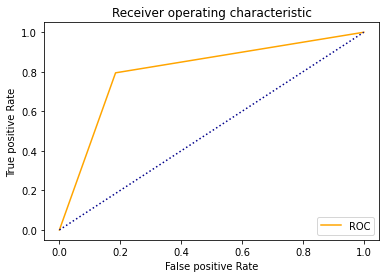

In [143]:
#roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
print('Threshold=',thresholds)
print('True positive rate=',tpr)
print('False positive Rate=',fpr)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='dotted')
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [144]:
auc_score=roc_auc_score(y_test,Final_model.predict(x_test))
print("AUC_score:",'\n',auc_score*100,"%")

AUC_score: 
 80.51080810638119 %


Here we plotted the ROC curve for the final model.The accuracy or AUC_score for the best model is 80.51%

In [145]:
#saving the model
import joblib
joblib.dump(Final_model,"Weather_Project.pkl")


['Weather_Project.pkl']

In [146]:
#predicting the saved model
model=joblib.load("Weather_Project.pkl")
#prediction
prediction=model.predict(x_test)
prediction

array([1, 1, 1, ..., 0, 0, 0])

In [147]:
g=np.array(y_test)
df2=pd.DataFrame()
df2['predicted']=prediction
df2["original"]=g
df2    

,predicted,original
0,1,1
1,1,1
2,1,1
3,1,1
4,0,1
...,...,...
2571,1,1
2572,1,1
2573,0,0
2574,0,0


Predicted is the chances of rainfall Tomorrow, to forecast whether or not it will rain tomorrow. 

Threshold= [2 1 0]
True positive rate= [0.         0.79471229 1.        ]
False positive Rate= [0.         0.18449612 1.        ]


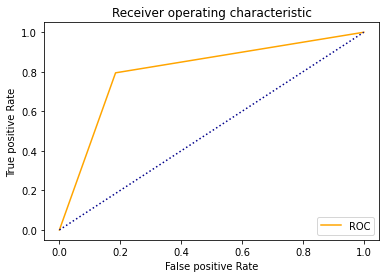

In [149]:
#roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
print('Threshold=',thresholds)
print('True positive rate=',tpr)
print('False positive Rate=',fpr)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='dotted')
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [150]:
auc_score=roc_auc_score(y_test,Final_model.predict(x_test))
print("AUC_score:",'\n',auc_score*100,"%")

AUC_score: 
 80.51080810638119 %


we have plotted the ROC curve for the final model and the AUC score for the best model is 80.51%

b)For Finding how much amount of Rainfall will be there:

Data Visualization:

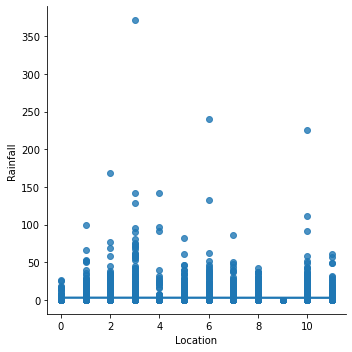

In [19]:
sns.lmplot(x="Location",y="Rainfall",data=df,palette="icefire")

Location has no high positive relation with Rainfall.

In [20]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

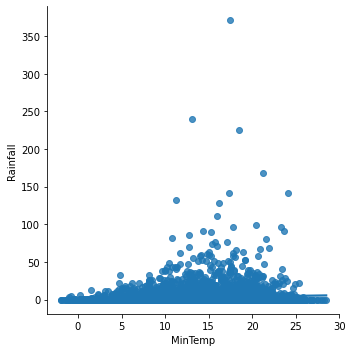

In [21]:
sns.lmplot(x="MinTemp",y="Rainfall",data=df,palette="icefire")

MinTemp has no high positive relation with Rainfall

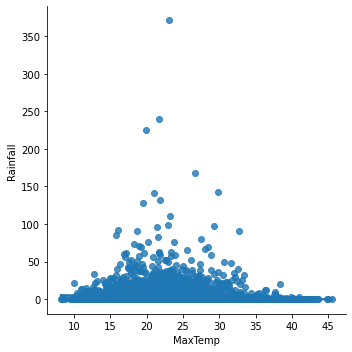

In [23]:
sns.lmplot(x="MaxTemp",y="Rainfall",data=df,palette="icefire")

MaxTemp has no high positive relation with Rainfall

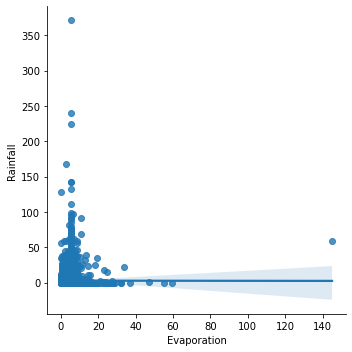

In [24]:
sns.lmplot(x="Evaporation",y="Rainfall",data=df,palette="icefire")

Evaporation  has no high positive relation with Rainfall.

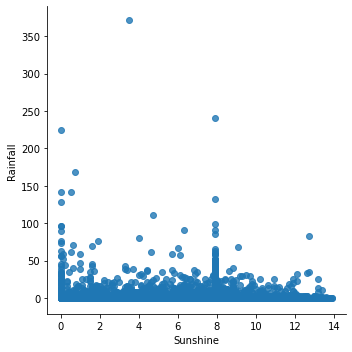

In [25]:
sns.lmplot(x="Sunshine",y="Rainfall",data=df,palette="icefire")

Sunshine has no high positive relation with Rainfall column.

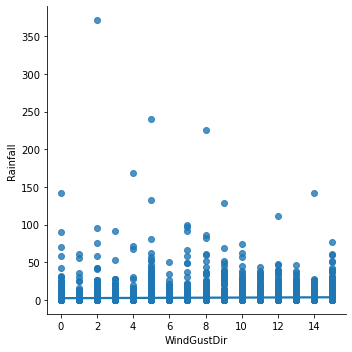

In [26]:
sns.lmplot(x="WindGustDir",y="Rainfall",data=df,palette="icefire")

WindGustDir has no high positive relation with Rainfall column.

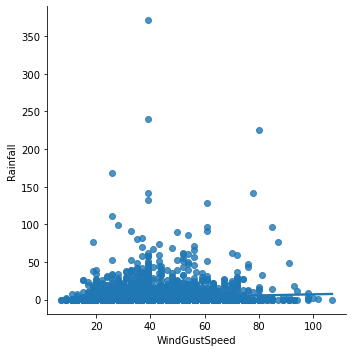

In [28]:
sns.lmplot(x="WindGustSpeed",y="Rainfall",data=df,palette="icefire")

WindGustSpeed has no high positive relation with Rainfall column.

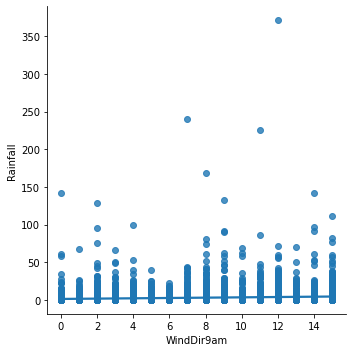

In [29]:
sns.lmplot(x="WindDir9am",y="Rainfall",data=df,palette="icefire")

WindDir9am has no high positive relation with Rainfall column.

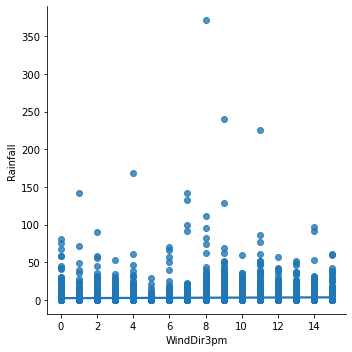

In [30]:
sns.lmplot(x="WindDir3pm",y="Rainfall",data=df,palette="icefire")

WindDir3pm has a positive relation with Rainfall column.

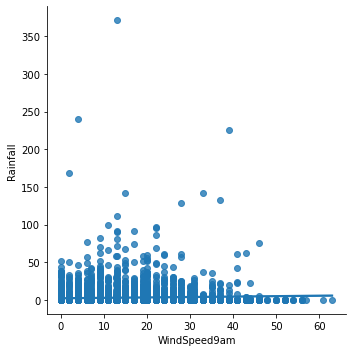

In [31]:
sns.lmplot(x="WindSpeed9am",y="Rainfall",data=df,palette="icefire")

WindSpeed9am has a positive relation with Rainfall column.

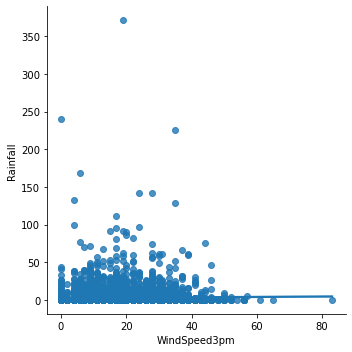

In [32]:
sns.lmplot(x="WindSpeed3pm",y="Rainfall",data=df,palette="icefire")

WindSpeed3pm has a positive relation with Rainfall column.

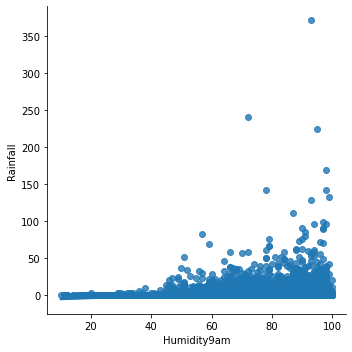

In [33]:
sns.lmplot(x="Humidity9am",y="Rainfall",data=df,palette="icefire")

Humidity9am has a positive relation with Rainfall column.

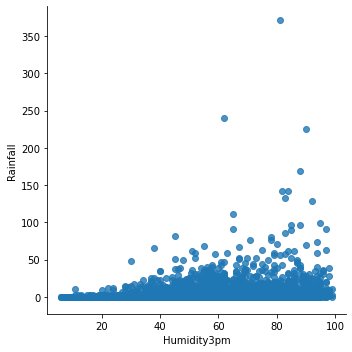

In [34]:
sns.lmplot(x="Humidity3pm",y="Rainfall",data=df,palette="icefire")

Humidity3pm has a positive relation with Rainfall column.

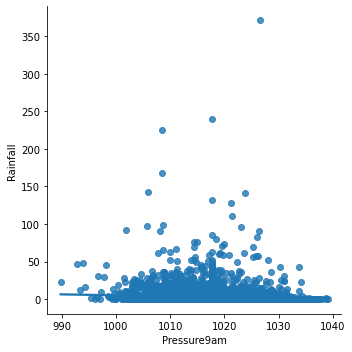

In [35]:
sns.lmplot(x="Pressure9am",y="Rainfall",data=df,palette="icefire")

Pressure9am has not a positive relation with Rainfall column.

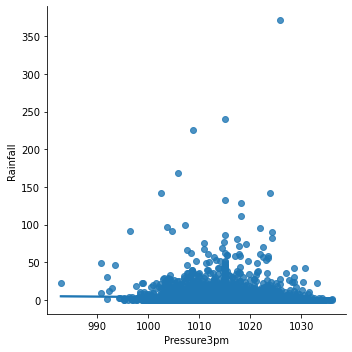

In [36]:
sns.lmplot(x="Pressure3pm",y="Rainfall",data=df,palette="icefire")

Pressure3pm has not a positive relation with Rainfall column.

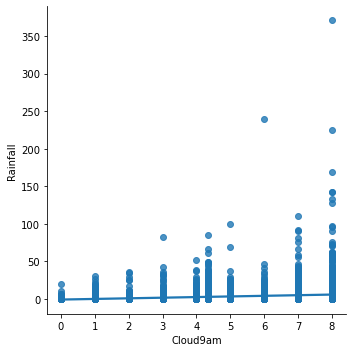

In [37]:
sns.lmplot(x="Cloud9am",y="Rainfall",data=df,palette="icefire")

Cloud9am has a positive relation with Rainfall column.

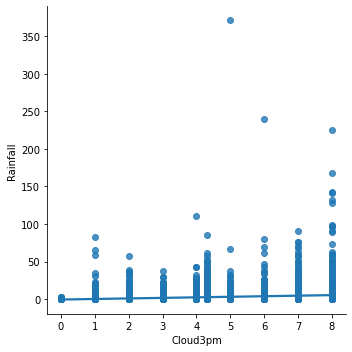

In [38]:
sns.lmplot(x="Cloud3pm",y="Rainfall",data=df,palette="icefire")

Cloud3pm has a positive relation with Rainfall column.

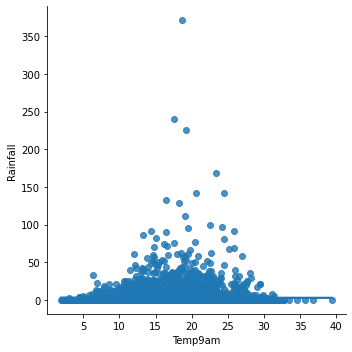

In [39]:
sns.lmplot(x="Temp9am",y="Rainfall",data=df,palette="icefire")

Temp9am has a positive relation with Rainfall column.

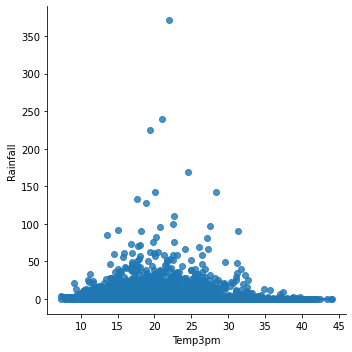

In [40]:
sns.lmplot(x="Temp3pm",y="Rainfall",data=df,palette="icefire")

Temp3pm has a positive relation with Rainfall column.

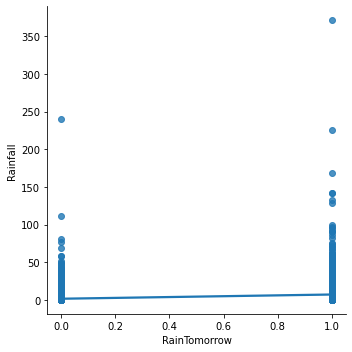

In [41]:
sns.lmplot(x="RainTomorrow",y="Rainfall",data=df,palette="icefire")

RainTomorrow has a positive relation with Rainfall column.

In [14]:
#Encoding categorical columns using Label Encoder
from sklearn.preprocessing import LabelEncoder
lab_encoder=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=lab_encoder.fit_transform(df[i])
df        

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,13.4,22.900000,0.6,5.302395,7.890896,13,44.000000,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,0,0
1,1,1,7.4,25.100000,0.0,5.302395,7.890896,14,44.000000,6,...,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,0,0
2,2,1,12.9,25.700000,0.0,5.302395,7.890896,15,46.000000,13,...,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,0,0
3,3,1,9.2,28.000000,0.0,5.302395,7.890896,4,24.000000,9,...,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,0,0
4,4,1,17.5,32.300000,1.0,5.302395,7.890896,13,41.000000,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999,9,2.8,23.400000,0.0,5.302395,7.890896,0,31.000000,9,...,51.0,24.0,1024.6,1020.3,4.336806,4.320988,10.1,22.4,0,0
8421,3000,9,3.6,25.300000,0.0,5.302395,7.890896,6,22.000000,9,...,56.0,21.0,1023.5,1019.1,4.336806,4.320988,10.9,24.5,0,0
8422,3001,9,5.4,26.900000,0.0,5.302395,7.890896,3,37.000000,9,...,53.0,24.0,1021.0,1016.8,4.336806,4.320988,12.5,26.1,0,0
8423,3002,9,7.8,27.000000,0.0,5.302395,7.890896,9,28.000000,10,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0


In [15]:
df.dtypes

Date               int32
Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
dtype: object

In [17]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")

In [18]:
df.dtypes

Date             datetime64[ns]
Location                  int32
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir               int32
WindGustSpeed           float64
WindDir9am                int32
WindDir3pm                int32
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                 int32
RainTomorrow              int32
dtype: object

In [19]:
#checking skewness in all the columns.
df.skew()

Location         -0.000009
MinTemp          -0.083706
MaxTemp           0.327598
Rainfall         13.650294
Evaporation      13.553368
Sunshine         -0.882147
WindGustDir       0.073316
WindGustSpeed     0.780437
WindDir9am       -0.022331
WindDir3pm       -0.103832
WindSpeed9am      0.957036
WindSpeed3pm      0.549797
Humidity9am      -0.256177
Humidity3pm       0.150860
Pressure9am       0.022085
Pressure3pm       0.042990
Cloud9am         -0.215085
Cloud3pm         -0.162159
Temp9am          -0.047213
Temp3pm           0.348100
RainToday         1.229153
RainTomorrow      1.229153
dtype: float64

skewness is present in Rainfall,Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, RainToday, RainTomorrow columns.Let us remove skewness using cbrt method and no need to remove skewness in RainToday target column.

In [20]:
#Let us remove skewness using cbrt method.
df["Rainfall"]=np.cbrt(df["Rainfall"])
df["Evaporation"]=np.cbrt(df["Evaporation"])
df["Sunshine"]=np.cbrt(df["Sunshine"])
df["WindGustSpeed"]=np.cbrt(df["WindGustSpeed"])
df["WindSpeed9am"]=np.cbrt(df["WindSpeed9am"])
df["RainTomorrow"]=np.cbrt(df["RainTomorrow"])

In [21]:
#Again checking skewness in all the columns.
df.skew()

Location        -0.000009
MinTemp         -0.083706
MaxTemp          0.327598
Rainfall         1.688052
Evaporation     -0.042985
Sunshine        -3.044226
WindGustDir      0.073316
WindGustSpeed   -0.035010
WindDir9am      -0.022331
WindDir3pm      -0.103832
WindSpeed9am    -1.122533
WindSpeed3pm     0.549797
Humidity9am     -0.256177
Humidity3pm      0.150860
Pressure9am      0.022085
Pressure3pm      0.042990
Cloud9am        -0.215085
Cloud3pm        -0.162159
Temp9am         -0.047213
Temp3pm          0.348100
RainToday        1.229153
RainTomorrow     1.229153
dtype: float64

still some skewness is present in Rainfall, Sunshine, WindSpeed9am, RainTomorrow  columns.

In [22]:
#correlation between Dependent variables and independent variable
df.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,1.000000,0.090425,0.070878,0.010377,0.127156,0.063281,-0.057569,0.276352,-0.093277,-0.002495,...,-0.033657,-0.001483,-0.037657,-0.024508,-0.008566,-0.010776,0.098533,0.066331,-0.002186,-0.002410
MinTemp,0.090425,1.000000,0.728065,0.101617,0.333271,-0.026167,-0.161528,0.267448,-0.071138,-0.145036,...,-0.154248,0.067683,-0.441253,-0.440363,0.095403,0.047495,0.891425,0.696419,0.074487,0.097330
MaxTemp,0.070878,0.728065,1.000000,-0.222646,0.436617,0.275641,-0.229601,0.185392,-0.235611,-0.162925,...,-0.424951,-0.430526,-0.337845,-0.413150,-0.245116,-0.241542,0.866584,0.974695,-0.228053,-0.163967
Rainfall,0.010377,0.101617,-0.222646,1.000000,-0.152570,-0.279004,0.123826,0.105773,0.177804,0.093181,...,0.423268,0.412276,-0.131729,-0.055814,0.333127,0.283771,-0.080810,-0.233395,0.864908,0.370869
Evaporation,0.127156,0.333271,0.436617,-0.152570,1.000000,0.307599,-0.121166,0.174656,-0.095102,-0.032139,...,-0.294734,-0.233290,-0.256328,-0.274691,-0.093941,-0.141825,0.392585,0.427794,-0.169484,-0.103429
Sunshine,0.063281,-0.026167,0.275641,-0.279004,0.307599,1.000000,-0.060424,-0.004436,-0.054685,-0.020920,...,-0.291307,-0.407544,0.015242,-0.027836,-0.448732,-0.470487,0.143081,0.291715,-0.234063,-0.326718
WindGustDir,-0.057569,-0.161528,-0.229601,0.123826,-0.121166,-0.060424,1.000000,0.010760,0.361401,0.517587,...,0.054906,0.060891,-0.117026,-0.032932,0.111870,0.082675,-0.182103,-0.243325,0.121302,0.045256
WindGustSpeed,0.276352,0.267448,0.185392,0.105773,0.174656,-0.004436,0.010760,1.000000,-0.121378,0.089974,...,-0.285577,-0.098288,-0.387462,-0.354655,0.005270,0.050947,0.250900,0.150338,0.087974,0.175111
WindDir9am,-0.093277,-0.071138,-0.235611,0.177804,-0.095102,-0.054685,0.361401,-0.121378,1.000000,0.225790,...,0.106798,0.172629,-0.001293,0.077296,0.103431,0.071772,-0.132263,-0.241454,0.162443,0.045552
WindDir3pm,-0.002495,-0.145036,-0.162925,0.093181,-0.032139,-0.020920,0.517587,0.089974,0.225790,1.000000,...,-0.010543,-0.016463,-0.136033,-0.047384,0.064222,0.043957,-0.150258,-0.172964,0.092028,0.003024


This gives the correlation between independent and dependent features

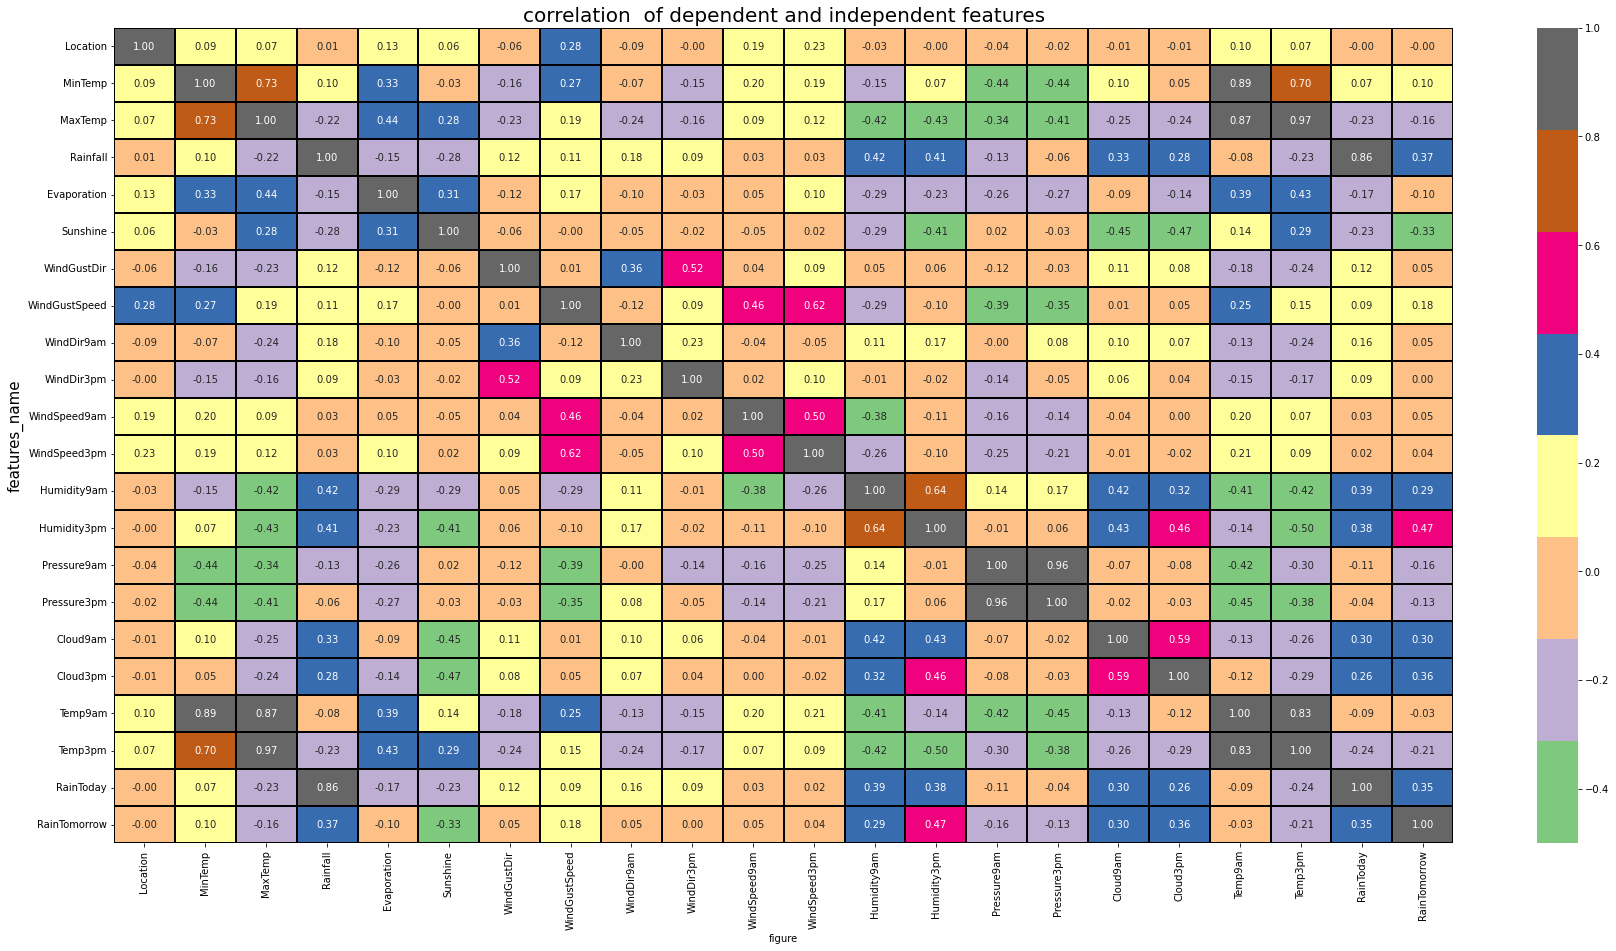

In [23]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), annot=True,fmt="0.2f",linewidth=0.2,linecolor="black",cmap="Accent")
plt.xlabel('figure',fontsize=10)
plt.ylabel("features_name",fontsize=15)
plt.title("correlation  of dependent and independent features",fontsize=20)
plt.show()

In [24]:
df.corr()['Rainfall'].sort_values(ascending=False)

Rainfall         1.000000
RainToday        0.864908
Humidity9am      0.423268
Humidity3pm      0.412276
RainTomorrow     0.370869
Cloud9am         0.333127
Cloud3pm         0.283771
WindDir9am       0.177804
WindGustDir      0.123826
WindGustSpeed    0.105773
MinTemp          0.101617
WindDir3pm       0.093181
WindSpeed9am     0.027148
WindSpeed3pm     0.025536
Location         0.010377
Pressure3pm     -0.055814
Temp9am         -0.080810
Pressure9am     -0.131729
Evaporation     -0.152570
MaxTemp         -0.222646
Temp3pm         -0.233395
Sunshine        -0.279004
Name: Rainfall, dtype: float64

we can observe both the positive and negative correlated features also.

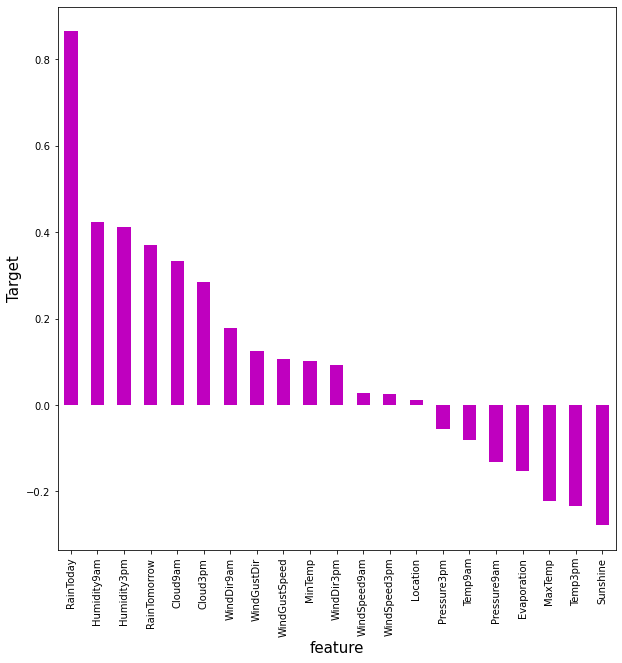

In [25]:
#visualizing the correlation between features and target
plt.figure(figsize=(10,10))
df.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind="bar",color="m")
plt.xlabel('feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.show()

In [26]:
#Seperating Features and label
df.drop("Date",axis=1,inplace=True)
x=df.drop("Rainfall",axis=1)
y=df["Rainfall"]

In [27]:
x.shape

(6762, 21)

In [28]:
y.shape

(6762,)

In [29]:
y.value_counts()

0.000000    4334
0.584804     321
0.736806     144
1.406121     138
0.843433      87
            ... 
4.194551       1
2.876464       1
3.940795       1
5.039684       1
3.419952       1
Name: Rainfall, Length: 251, dtype: int64

Feature Scaling using RobustScaler:

In [30]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
X

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,-0.869565,0.034626,-0.068182,0.0,0.0,0.750,0.293779,0.666667,0.750,0.576117,...,0.125000,-1.166667,-1.481539,-1.162308,0.732639,0.000000,-0.120482,-0.059524,0.0,0.0
1,-0.869565,-0.679660,0.181818,0.0,0.0,0.875,0.293779,-0.111111,0.875,-0.747790,...,-1.000000,-1.041667,-1.048703,-1.060858,0.000000,0.000000,-0.084337,0.238095,0.0,0.0
2,-0.869565,-0.024898,0.250000,0.0,0.0,1.000,0.404535,0.666667,0.875,0.522062,...,-1.250000,-0.833333,-1.496464,-0.930424,0.000000,-0.773663,0.373494,0.107143,0.0,0.0
3,-0.869565,-0.465374,0.511364,0.0,0.0,-0.375,-1.063574,0.222222,-1.000,0.000000,...,-0.958333,-1.416667,-0.003927,-0.336221,0.000000,0.000000,0.024096,0.500000,0.0,0.0
4,-0.869565,0.522721,1.000000,0.0,0.0,0.750,0.121167,-0.666667,-0.125,-0.365389,...,0.583333,-0.708333,-1.018852,-1.321728,0.532639,1.226337,-0.012048,0.880952,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,0.521739,-1.227279,-0.011364,0.0,0.0,-0.875,-0.523697,0.222222,-0.875,0.149603,...,-0.708333,-1.083333,1.040849,0.750736,0.000000,0.000000,-0.939759,0.011905,0.0,0.0
6758,0.521739,-1.132041,0.204545,0.0,0.0,-0.125,-1.236876,0.222222,-0.625,0.149603,...,-0.500000,-1.208333,0.876670,0.576823,0.000000,0.000000,-0.843373,0.261905,0.0,0.0
6759,0.521739,-0.917755,0.386364,0.0,0.0,-0.500,-0.122615,0.222222,0.750,-0.169035,...,-0.625000,-1.083333,0.503536,0.243489,0.000000,0.000000,-0.650602,0.452381,0.0,0.0
6760,0.521739,-0.632041,0.397727,0.0,0.0,0.250,-0.743933,0.333333,-0.625,0.149603,...,-0.708333,-1.083333,0.264730,0.200011,-0.267361,-0.773663,-0.337349,0.440476,0.0,0.0


we have scaled the data using Robust Scaler to overcome the issue of biasness.

In [31]:
#Finding variance inflation factor in each scaled column.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["features"]=X.columns
vif

,VIF values,features
0,1.202423,Location
1,8.631487,MinTemp
2,26.103241,MaxTemp
3,1.445444,Evaporation
4,1.622563,Sunshine
5,1.599049,WindGustDir
6,2.125258,WindGustSpeed
7,1.302189,WindDir9am
8,1.483645,WindDir3pm
9,1.679117,WindSpeed9am


By checking the vif values, we can find the features causing multi collinearity problem.Here we can find the feature MaxTemp,Pressure9am,Pressure3pm, Temp9am, Temp3pm with high vif value .so, we will drop the column Temp3pm with high vif value.

In [32]:
X.drop("Temp3pm",axis=1,inplace=True)

In [33]:
# Again Finding variance inflation factor in each scaled column.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["features"]=X.columns
vif

,VIF values,features
0,1.201910,Location
1,8.546703,MinTemp
2,8.968095,MaxTemp
3,1.443628,Evaporation
4,1.619596,Sunshine
5,1.594359,WindGustDir
6,2.115895,WindGustSpeed
7,1.301962,WindDir9am
8,1.483618,WindDir3pm
9,1.677922,WindSpeed9am


still Pressure9am column has high vif value,so we will drop the Pressure9am column.

In [34]:
X.drop("Pressure9am",axis=1,inplace=True)

In [41]:
# Again Finding variance inflation factor in each scaled column.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["features"]=X.columns
vif

,VIF values,features
0,1.189320,Location
1,8.189056,MinTemp
2,8.632035,MaxTemp
3,1.331459,Evaporation
4,1.312993,Sunshine
5,1.575184,WindGustDir
6,2.022227,WindGustSpeed
7,1.280055,WindDir9am
8,1.418964,WindDir3pm
9,1.352170,WindSpeed9am


In [35]:
X.drop("Temp9am",axis=1,inplace=True)

In [36]:
# Again Finding variance inflation factor in each scaled column.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["features"]=X.columns
vif

,VIF values,features
0,1.193161,Location
1,4.421852,MinTemp
2,5.264822,MaxTemp
3,1.434136,Evaporation
4,1.609734,Sunshine
5,1.571366,WindGustDir
6,2.078150,WindGustSpeed
7,1.281260,WindDir9am
8,1.417668,WindDir3pm
9,1.675697,WindSpeed9am


Now multi collinearity is solved.we can now move ahead for model building.

Modelling:

In [37]:
#import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


In [38]:
#creating train test split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=200)

In [39]:
from sklearn import metrics

In [40]:
def r2_score(name,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=name.predict(x_train)
        print("r2_score on training data",metrics.r2_score(y_train,y_pred)*100)
        
    else:
         if train==False:
            y_test_pred=name.predict(x_test)
            print("r2_score:",metrics.r2_score(y_test,y_test_pred))
            print("Mean absolute error:-",mean_absolute_error(y_test,y_test_pred))
            print("mean squared error:-",mean_squared_error(y_test,y_test_pred))
            print("Root mean squared error:-",np.sqrt(mean_squared_error(y_test,y_test_pred)))  

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [42]:
#Model initiation for LinearRegression
name=LinearRegression()
name.fit(x_train,y_train)

LinearRegression()

In [43]:
r2_score(name,x_train,x_test,y_train,y_test,train=True)
r2_score(name,x_train,x_test,y_train,y_test,train=False)   

r2_score on training data 77.45865161019383
r2_score: 0.7589324671036195
Mean absolute error:- 0.2876702396410199
mean squared error:- 0.19541389734100748
Root mean squared error:- 0.4420564413522412


r2_score using Linear Regression is 75.89%=76%

In [44]:
#finding the random state
maxAccuracy=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=i)
    name=LinearRegression()
    name.fit(x_train,y_train)
    y_test_pred=name.predict(x_test)
    acc=metrics.r2_score(y_test,y_test_pred)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRs=i
print("maximum r2_score is ",maxAccuracy,"on Random state",maxRs)        

maximum r2_score is  0.7886745624307293 on Random state 29


In [45]:
#finding cv score
from sklearn.model_selection import cross_val_score
score=cross_val_score(name,X,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(metrics.r2_score(y_test,y_test_pred)-score.mean())*100)

[0.76922123 0.76009285 0.73164337 0.73782776 0.83246478]
0.7662499970063703
Difference between R2 score and cross validation score is : 1.3690149919232675


In [46]:
#Model initiation for RandomForestRegressor
name1=RandomForestRegressor()
name1.fit(x_train,y_train)

RandomForestRegressor()

In [47]:
r2_score(name1,x_train,x_test,y_train,y_test,train=True)
r2_score(name1,x_train,x_test,y_train,y_test,train=False)   

r2_score on training data 96.6802846334979
r2_score: 0.785564770166892
Mean absolute error:- 0.27076595696656214
mean squared error:- 0.16568335238930376
Root mean squared error:- 0.4070421997647219


r2_score using RandomForestRegressor is 78.55%=79%

In [48]:
#finding cv score
from sklearn.model_selection import cross_val_score
score1=cross_val_score(name1,X,y)
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation score is :",(metrics.r2_score(y_test,y_test_pred)-score1.mean())*100)

[0.77374805 0.75658104 0.7196349  0.72604061 0.83189249]
0.7615794197751619
Difference between R2 score and cross validation score is : 1.8360727150441125


In [49]:
#Model initiation for KNN
name2=KNN()
name2.fit(x_train,y_train)

KNeighborsRegressor()

In [50]:
r2_score(name2,x_train,x_test,y_train,y_test,train=True)
r2_score(name2,x_train,x_test,y_train,y_test,train=False)   

r2_score on training data 70.68792451311512
r2_score: 0.5824771021292485
Mean absolute error:- 0.3490728813140587
mean squared error:- 0.3225990126359468
Root mean squared error:- 0.5679780036550243


r2_score using KNN is 58.24%=58%

In [51]:
#finding cv score
from sklearn.model_selection import cross_val_score
score2=cross_val_score(name2,X,y)
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation score is :",(metrics.r2_score(y_test,y_test_pred)-score2.mean())*100)

[0.63378014 0.54353578 0.45787096 0.40816867 0.55997375]
0.5206658597543805
Difference between R2 score and cross validation score is : 25.927428717122247


In [52]:
#Model initiation for GradientBoostingRegressor
name3=GradientBoostingRegressor()
name3.fit(x_train,y_train)

GradientBoostingRegressor()

In [53]:
r2_score(name3,x_train,x_test,y_train,y_test,train=True)
r2_score(name3,x_train,x_test,y_train,y_test,train=False)   

r2_score on training data 82.79493969472253
r2_score: 0.7893714162299847
Mean absolute error:- 0.26504325335016204
mean squared error:- 0.1627421478046671
Root mean squared error:- 0.4034131229951092


r2 score using GradientBoosting Regressor is 78.93%=79%

In [54]:
#finding cv score
from sklearn.model_selection import cross_val_score
score3=cross_val_score(name3,X,y)
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation score is :",(metrics.r2_score(y_test,y_test_pred)-score3.mean())*100)

[0.78546544 0.7547166  0.73913627 0.73299159 0.83574984]
0.7696119480313387
Difference between R2 score and cross validation score is : 1.0328198894264284


In [55]:
#Model initiation for Lasso
name4=Lasso()
name4.fit(x_train,y_train)

Lasso()

In [56]:
r2_score(name4,x_train,x_test,y_train,y_test,train=True)
r2_score(name4,x_train,x_test,y_train,y_test,train=False)   

r2_score on training data 0.0
r2_score: -4.1584731979016354e-05
Mean absolute error:- 0.7113419391956236
mean squared error:- 0.7726820001361745
Root mean squared error:- 0.8790233217248417


r2 score using Lasso is -4.15%

In [57]:
#finding cv score
from sklearn.model_selection import cross_val_score
score4=cross_val_score(name4,X,y)
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation score is :",(metrics.r2_score(y_test,y_test_pred)-score4.mean())*100)

[-7.45539566e-05 -5.70455809e-03  4.64143224e-04 -2.88905916e-05
 -2.97080386e-02]
-0.007010379612997242
Difference between R2 score and cross validation score is : 78.69505265386002


In [58]:
#Model initiation for Ridge
name5=Ridge()
name5.fit(x_train,y_train)

Ridge()

In [59]:
r2_score(name5,x_train,x_test,y_train,y_test,train=True)
r2_score(name5,x_train,x_test,y_train,y_test,train=False)   

r2_score on training data 76.5813027229539
r2_score: 0.7799333134198436
Mean absolute error:- 0.28088256103734677
mean squared error:- 0.17003449671112297
Root mean squared error:- 0.412352393846723


r2 score using Ridge is 77.99%=78%

In [60]:
#finding cv score
from sklearn.model_selection import cross_val_score
score5=cross_val_score(name5,X,y)
print(score5)
print(score5.mean())
print("Difference between R2 score and cross validation score is :",(metrics.r2_score(y_test,y_test_pred)-score5.mean())*100)

[0.76920641 0.76004666 0.7316402  0.73792874 0.8324021 ]
0.7662448224670525
Difference between R2 score and cross validation score is : 1.3695324458550484


In [61]:
#Model initiation for DecisionTreeRegressor
name6=DecisionTreeRegressor()
name6.fit(x_train,y_train)

DecisionTreeRegressor()

In [62]:
r2_score(name6,x_train,x_test,y_train,y_test,train=True)
r2_score(name6,x_train,x_test,y_train,y_test,train=False)   

r2_score on training data 99.96506810361778
r2_score: 0.5111282359505345
Mean absolute error:- 0.3309087471849932
mean squared error:- 0.377726704792061
Root mean squared error:- 0.614594748425384


r2 score using DecisionTreeRegressor is 51.11%

In [63]:
#finding cv score
from sklearn.model_selection import cross_val_score
score6=cross_val_score(name6,X,y)
print(score6)
print(score6.mean())
print("Difference between R2 score and cross validation score is :",(metrics.r2_score(y_test,y_test_pred)-score6.mean())*100)

[0.5933904  0.29811681 0.43145069 0.42635223 0.577637  ]
0.4653894251764081
Difference between R2 score and cross validation score is : 31.45507217491949


In [64]:
from sklearn.svm import SVR
#Model initiation for SVR
name7=SVR()
name7.fit(x_train,y_train)

SVR()

In [65]:
r2_score(name7,x_train,x_test,y_train,y_test,train=True)
r2_score(name7,x_train,x_test,y_train,y_test,train=False)   

r2_score on training data 77.95407546324711
r2_score: 0.7668958660225876
Mean absolute error:- 0.2569120876371294
mean squared error:- 0.18010787874381293
Root mean squared error:- 0.4243911859874247


r2 score using SVR is 76.68%=77%

In [66]:
#finding cv score
from sklearn.model_selection import cross_val_score
score7=cross_val_score(name7,X,y)
print(score7)
print(score7.mean())
print("Difference between R2 score and cross validation score is :",(metrics.r2_score(y_test,y_test_pred)-score7.mean())*100)

[0.76343584 0.73451415 0.68663924 0.68150754 0.79505145]
0.732229645143479
Difference between R2 score and cross validation score is : 4.771050178212399


In [67]:
from sklearn.ensemble import ExtraTreesRegressor
#Model initiation for ExtraTreesRegressor
name8=ExtraTreesRegressor()
name8.fit(x_train,y_train)

ExtraTreesRegressor()

In [68]:
r2_score(name8,x_train,x_test,y_train,y_test,train=True)
r2_score(name8,x_train,x_test,y_train,y_test,train=False)   

r2_score on training data 99.96506810361778
r2_score: 0.7791336674097935
Mean absolute error:- 0.2715607167520075
mean squared error:- 0.17065234309659302
Root mean squared error:- 0.4131008873103434


r2 score using ExtraTreesRegressor is 77.91%=78%

In [69]:
#finding cv score
from sklearn.model_selection import cross_val_score
score8=cross_val_score(name8,X,y)
print(score8)
print(score8.mean())
print("Difference between R2 score and cross validation score is :",(metrics.r2_score(y_test,y_test_pred)-score8.mean())*100)

[0.77944078 0.75806229 0.72296204 0.72810417 0.83554961]
0.7648237777000337
Difference between R2 score and cross validation score is : 1.5116369225569248


we can observe from the difference of both r2_score and cv_score computed on R2_score we can conclude that GradientBoostingRegressor as our best fitting and best performing model.

Hyper Parameter Tuning:

In [70]:
from sklearn.model_selection import GridSearchCV

In [73]:
parameters={'n_estimators': [100, 500],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]}

In [74]:
gsv=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5,n_jobs=-1)

In [75]:
gsv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 500]})

In [76]:
gsv.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 500}

In [77]:
model=GradientBoostingRegressor(learning_rate=0.01,min_samples_leaf=2,min_samples_split=4,n_estimators=500)

In [78]:
model.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, min_samples_leaf=2,
                          min_samples_split=4, n_estimators=500)

In [86]:
y_predict=model.predict(x_train)
print("r2_score on training data",metrics.r2_score(y_train,y_predict)*100)
        

r2_score on training data 80.55299553355667


In [87]:
pred=model.predict(x_test)

In [88]:
print("R2_score:",metrics.r2_score(y_test,pred))
print("Mean Absolute error:",mean_absolute_error(y_test,pred))
print("mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.790295409152352
Mean Absolute error: 0.2690694113311307
mean squared error: 0.1620282247935977
Root mean squared error: 0.4025272969546261


r2 score using Hyper parameter Tuning for GradientBoostingRegressor is 79.02%

In [89]:
import pickle     #to save the model
file_name="Weather__Project.pkl"
pickle.dump(model,open(file_name,'wb'))

In [90]:
import pickle #to load the model
loaded_model=pickle.load(open("Weather__Project.pkl",'rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

79.0295409152352


r2 score for the loaded model is 79.02%

In [93]:
pred=model.predict(x_test)

In [94]:
G=np.array(y_test)
df3=pd.DataFrame()
df3['predicted']=pred
df3["original"]=G
df3    

,predicted,original
0,0.140851,0.000000
1,0.089550,0.000000
2,0.074774,0.000000
3,0.017549,0.000000
4,0.093662,0.000000
...,...,...
2024,1.716488,1.587401
2025,0.261172,0.000000
2026,0.122480,0.000000
2027,0.173445,0.000000


Predicted is the result of amount of Rainfall could be there tomorrow based on details given in the dataset.